In [1]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats
from scipy.stats import t
from statannot import add_stat_annotation


import moabb
import moabb.analysis.plotting as moabb_plt
from moabb.analysis.meta_analysis import (  # noqa: E501
    compute_dataset_statistics,
    find_significant_differences,
)

In [4]:
import numpy as np

In [ ]:
b = np.zeros((50,8,175))
a = np.mean(b,axis=0)
print(a.shape)
np.repeat(a,10,axis=1)


(8, 175)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Get the results files

In [ ]:
# CNN_DG_sc = pd.read_csv("../results/score_code/CNN_DG_score_code.csv",index_col=0)
# CNN_DA_sc = pd.read_csv("../results/score_code/CNN_DA_score_code.csv",index_col=0)
# CNN_SS_sc = pd.read_csv("../results/score_code/CNN_SS_score_code.csv",index_col=0)
CNN_DGrec_sc = pd.read_csv("../results/score_code/CNN_DG_score_code_recentered.csv",index_col=0)
CNN_DArec_sc = pd.read_csv("../results/score_code/CNN_DA_score_code_recentered.csv",index_col=0)
CNN_SSrec_sc = pd.read_csv("../results/score_code/CNN_SS_score_code_recentered.csv",index_col=0)

# SPD_DG_sc = pd.read_csv("../results/score_code/SPD_DG_score_code.csv",index_col=0)
# SPD_DA_sc = pd.read_csv("../results/score_code/SPD_DA_score_code.csv",index_col=0)
# SPD_SS_sc = pd.read_csv("../results/score_code/SPD_SS_score_code.csv",index_col=0)
SPD_DGrec_sc = pd.read_csv("../results/score_code/SPD_DG_score_code_recentered.csv",index_col=0)
SPD_DArec_sc = pd.read_csv("../results/score_code/SPD_DA_score_code_recentered.csv",index_col=0)
SPD_SSrec_sc = pd.read_csv("../results/score_code/SPD_SS_score_code_recentered.csv",index_col=0)

# SPDBN_DG_sc = pd.read_csv("../results/score_code/SPDBN_DG_score_code.csv",index_col=0)
# SPDBN_DA_sc = pd.read_csv("../results/score_code/SPDBN_DA_score_code.csv",index_col=0)
# SPDBN_SS_sc = pd.read_csv("../results/score_code/SPDBN_SS_score_code.csv",index_col=0)
SPDBN_DGrec_sc = pd.read_csv("../results/score_code/SPDBN_DG_score_code_recentered.csv",index_col=0)
SPDBN_DArec_sc = pd.read_csv("../results/score_code/SPDBN_DA_score_code_recentered.csv",index_col=0)
SPDBN_SSrec_sc = pd.read_csv("../results/score_code/SPDBN_SS_score_code_recentered.csv",index_col=0)

In [ ]:
# CNN_DG_tt = pd.read_csv("../results/tps_train/CNN_DG_tps_train.csv",index_col=0)
# CNN_DA_tt = pd.read_csv("../results/tps_train/CNN_DA_tps_train.csv",index_col=0)
# CNN_SS_tt = pd.read_csv("../results/tps_train/CNN_SS_tps_train.csv",index_col=0)
CNN_DGrec_tt = pd.read_csv("../results/tps_train/CNN_DG_tps_train_recentered.csv",index_col=0)
CNN_DArec_tt = pd.read_csv("../results/tps_train/CNN_DA_tps_train_recentered.csv",index_col=0)
CNN_SSrec_tt = pd.read_csv("../results/tps_train/CNN_SS_tps_train_recentered.csv",index_col=0)

# SPD_DG_tt = pd.read_csv("../results/tps_train/SPD_DG_tps_train.csv",index_col=0)
# SPD_DA_tt = pd.read_csv("../results/tps_train/SPD_DA_tps_train.csv",index_col=0)
# SPD_SS_tt = pd.read_csv("../results/tps_train/SPD_SS_tps_train.csv",index_col=0)
SPD_DGrec_tt = pd.read_csv("../results/tps_train/SPD_DG_tps_train_recentered.csv",index_col=0)
SPD_DArec_tt = pd.read_csv("../results/tps_train/SPD_DA_tps_train_recentered.csv",index_col=0)
SPD_SSrec_tt = pd.read_csv("../results/tps_train/SPD_SS_tps_train_recentered.csv",index_col=0)

# SPDBN_DG_tt = pd.read_csv("../results/tps_train/SPDBN_DG_tps_train.csv",index_col=0)
# SPDBN_DA_tt = pd.read_csv("../results/tps_train/SPDBN_DA_tps_train.csv",index_col=0)
# SPDBN_SS_tt = pd.read_csv("../results/tps_train/SPDBN_SS_tps_train.csv",index_col=0)
SPDBN_DGrec_tt = pd.read_csv("../results/tps_train/SPDBN_DG_tps_train_recentered.csv",index_col=0)
SPDBN_DArec_tt = pd.read_csv("../results/tps_train/SPDBN_DA_tps_train_recentered.csv",index_col=0)
SPDBN_SSrec_tt = pd.read_csv("../results/tps_train/SPDBN_SS_tps_train_recentered.csv",index_col=0)

# New dataset

In [19]:
CNN_DGrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_DG_score_code_recentered.csv",index_col=0)
CNN_DArec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_DA_score_code_recentered.csv",index_col=0)
CNN_SSrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/CNN_SS_score_code_recentered.csv",index_col=0)


SPD_DGrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_DG_score_code_recentered.csv",index_col=0)
SPD_DArec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_DA_score_code_recentered.csv",index_col=0)
SPD_SSrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPD_SS_score_code_recentered.csv",index_col=0)

SPDBN_DGrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_DG_score_code_recentered.csv",index_col=0)
SPDBN_DArec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_DA_score_code_recentered.csv",index_col=0)
SPDBN_SSrec_sc = pd.read_csv("../results/new_dataset/Score_TF/score_code/SPDBN_SS_score_code_recentered.csv",index_col=0)

GreenXD_DGrec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_DG_score_code_0.35_recentered.csv",index_col=0).mean()
GreenXD_DArec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_DA_score_code_0.35_recentered.csv",index_col=0).mean()
GreenXD_SSrec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_SS_score_code_0.35_recentered.csv",index_col=0).mean()

In [20]:
CNN_DGrec_tt = pd.read_csv("../results/new_dataset/Score_TF/CNN/temps_train_code/DG_tps_train_code.csv",index_col=0)
CNN_DArec_tt = pd.read_csv("../results/new_dataset/Score_TF/CNN/temps_train_code/DA_tps_train_code.csv",index_col=0)
CNN_SSrec_tt = pd.read_csv("../results/new_dataset/Score_TF/CNN/temps_train_code/SS_tps_train_code.csv",index_col=0)

SPD_DGrec_tt = pd.read_csv("../results/new_dataset/Score_TF/SPD/temps_train_code/DG_tps_train_code.csv",index_col=0)
SPD_DArec_tt = pd.read_csv("../results/new_dataset/Score_TF/SPD/temps_train_code/DA_tps_train_code.csv",index_col=0)
SPD_SSrec_tt = pd.read_csv("../results/new_dataset/Score_TF/SPD/temps_train_code/SS_tps_train_code.csv",index_col=0)

SPDBN_DGrec_tt = pd.read_csv("../results/new_dataset/Score_TF/SPDBN/temps_train_code/DG_tps_train_code.csv",index_col=0)
SPDBN_DArec_tt = pd.read_csv("../results/new_dataset/Score_TF/SPDBN/temps_train_code/DA_tps_train_code.csv",index_col=0)
SPDBN_SSrec_tt = pd.read_csv("../results/new_dataset/Score_TF/SPDBN/temps_train_code/SS_tps_train_code.csv",index_col=0)

GreenXD_DGrec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/old/tps_train/Green_DG_tps_train_0.35_recentered.csv",index_col=0).mean()
GreenXD_DArec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/old/tps_train/Green_DA_tps_train_0.35_recentered.csv",index_col=0).mean()
GreenXD_SSrec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/old/tps_train/Green_SS_tps_train_0.35_recentered.csv",index_col=0).mean()

## Calcul the mean

In [21]:
# print("mean of each fold for CNN_DG:\n",CNN_DG_sc.mean(axis=0))
# print("mean of each fold for CNN_DA:\n",CNN_DA_sc.mean(axis=0))
# print("mean of each fold for CNN_SS:\n",CNN_SS_sc.mean(axis=0))
print("mean of each fold for CNN_DGrec:\n",CNN_DGrec_sc.mean(axis=0))
print("mean of each fold for CNN_DA:\n",CNN_DArec_sc.mean(axis=0))
print("mean of each fold for CNN_SSrec:\n",CNN_SSrec_sc.mean(axis=0))

# print("mean of each fold for SPD_DG:\n",SPD_DG_sc.mean(axis=0))
# print("mean of each fold for SPD_DA:\n",SPD_DA_sc.mean(axis=0))
# print("mean of each fold for SPD_SS:\n",SPD_SS_sc.mean(axis=0))
print("mean of each fold for SPD_DGrec:\n",SPD_DGrec_sc.mean(axis=0))
print("mean of each fold for SPD_DA:\n",SPD_DArec_sc.mean(axis=0))
print("mean of each fold for SPD_SSrec:\n",SPD_SSrec_sc.mean(axis=0))

# print("mean of each fold for SPDBN_DG:\n",SPDBN_DG_sc.mean(axis=0))
# print("mean of each fold for SPDBN_DA:\n",SPDBN_DA_sc.mean(axis=0))
# print("mean of each fold for SPDBN_SS:\n",SPDBN_SS_sc.mean(axis=0))
print("mean of each fold for SPDBN_DGrec:\n",SPDBN_DGrec_sc.mean(axis=0))
print("mean of each fold for SPDBN_DA:\n",SPDBN_DArec_sc.mean(axis=0))
print("mean of each fold for SPDBN_SSrec:\n",SPDBN_SSrec_sc.mean(axis=0))

mean of each fold for CNN_DGrec:
 0     0.76
1     0.84
2     0.29
3     0.88
4     0.76
5     0.87
6     0.80
7     0.93
8     0.85
9     0.75
10    0.65
11    0.60
12    0.76
13    0.89
14    0.45
15    0.97
16    0.79
17    0.92
18    0.24
19    0.80
20    0.63
21    0.47
22    0.39
23    0.95
dtype: float64
mean of each fold for CNN_DA:
 0     0.82
1     0.89
2     0.24
3     0.85
4     0.76
5     0.93
6     0.80
7     0.95
8     0.80
9     0.71
10    0.85
11    0.62
12    0.76
13    0.87
14    0.51
15    0.95
16    0.84
17    0.91
18    0.18
19    0.78
20    0.80
21    0.49
22    0.40
23    0.95
dtype: float64
mean of each fold for CNN_SSrec:
 0     1.00
1     1.00
2     0.78
3     0.90
4     1.00
5     0.95
6     0.80
7     0.98
8     0.75
9     0.35
10    0.88
11    0.72
12    0.75
13    0.95
14    0.50
15    0.98
16    0.92
17    0.98
18    0.72
19    0.78
20    0.98
21    0.92
22    0.50
23    1.00
dtype: float64
mean of each fold for SPD_DGrec:
 0     1.00
1     0.93
2     0.

In [22]:
# print("median of each fold for CNN_DG:\n",np.median(CNN_DG_sc.median(axis=0)))
# print("median of each fold for CNN_DA:\n",np.median(CNN_DA_sc.median(axis=0)))
# print("median of each fold for CNN_SS:\n",np.median(CNN_SS_sc.median(axis=0)))
print("median of each fold for CNN_DGrec:\n",np.median(CNN_DGrec_sc.median(axis=0)))
print("median of each fold for CNN_DArec:\n",np.median(CNN_DArec_sc.median(axis=0)))
print("median of each fold for CNN_SSrec:\n",np.median(CNN_SSrec_sc.median(axis=0)))

# print("median of each fold for SPD_DG:\n",np.median(SPD_DG_sc.median(axis=0)))
# print("median of each fold for SPD_DA:\n",np.median(SPD_DA_sc.median(axis=0)))
# print("median of each fold for SPD_SS:\n",np.median(SPD_SS_sc.median(axis=0)))
print("median of each fold for SPD_DGrec:\n",np.median(SPD_DGrec_sc.median(axis=0)))
print("median of each fold for SPD_DArec:\n",np.median(SPD_DArec_sc.median(axis=0)))
print("median of each fold for SPD_SSrec:\n",np.median(SPD_SSrec_sc.median(axis=0)))

# print("median of each fold for SPDBN_DG:\n",np.median(SPDBN_DG_sc.median(axis=0)))
# print("median of each fold for SPDBN_DA:\n",np.median(SPDBN_DA_sc.median(axis=0)))
# print("median of each fold for SPDBN_SS:\n",np.median(SPDBN_SS_sc.median(axis=0)))
print("median of each fold for SPDBN_DGrec:\n",np.median(SPDBN_DGrec_sc.median(axis=0)))
print("median of each fold for SPDBN_DArec:\n",np.median(SPDBN_DArec_sc.median(axis=0)))
print("median of each fold for SPDBN_SSrec:\n",np.median(SPDBN_SSrec_sc.median(axis=0)))

median of each fold for CNN_DGrec:
 0.775
median of each fold for CNN_DArec:
 0.8
median of each fold for CNN_SSrec:
 0.91
median of each fold for SPD_DGrec:
 0.93
median of each fold for SPD_DArec:
 0.95
median of each fold for SPD_SSrec:
 0.92
median of each fold for SPDBN_DGrec:
 0.925
median of each fold for SPDBN_DArec:
 0.93
median of each fold for SPDBN_SSrec:
 0.82


# Statistical test

### Corrested std

In [71]:
def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std

In [72]:
def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

## score code

In [23]:
# CNN_DG_v = np.concatenate(CNN_DG_sc.values)
# CNN_DA_v = np.concatenate(CNN_DA_sc.values)
# CNN_SS_v = np.concatenate(CNN_SS_sc.values)
CNN_DGrec_v = np.concatenate(CNN_DGrec_sc.values)
CNN_DArec_v = np.concatenate(CNN_DArec_sc.values)
CNN_SSrec_v = np.concatenate(CNN_SSrec_sc.values)

# SPD_DG_v = np.concatenate(SPD_DG_sc.values)
# SPD_DA_v = np.concatenate(SPD_DA_sc.values)
# SPD_SS_v = np.concatenate(SPD_SS_sc.values)
SPD_DGrec_v = np.concatenate(SPD_DGrec_sc.values)
SPD_DArec_v = np.concatenate(SPD_DArec_sc.values)
SPD_SSrec_v = np.concatenate(SPD_SSrec_sc.values)

# SPDBN_DG_v = np.concatenate(SPDBN_DG_sc.values)
# SPDBN_DA_v = np.concatenate(SPDBN_DA_sc.values)
# SPDBN_SS_v = np.concatenate(SPDBN_SS_sc.values)
SPDBN_DGrec_v = np.concatenate(SPDBN_DGrec_sc.values)
SPDBN_DArec_v = np.concatenate(SPDBN_DArec_sc.values)
SPDBN_SSrec_v = np.concatenate(SPDBN_SSrec_sc.values)

GreenXD_DGrec_v = GreenXD_DGrec_sc.values
GreenXD_DArec_v = GreenXD_DArec_sc.values
GreenXD_SSrec_v = GreenXD_SSrec_sc.values

n_train_DG = 26400
n_train_DA = 27040
n_train_SS = 1120

n_test_DG = 7020
n_test_DA = 5148
n_test_SS = 3744

In [24]:

CNN_DGrec_vtt = np.concatenate(CNN_DGrec_tt.values)
CNN_DArec_vtt = np.concatenate(CNN_DArec_tt.values)
CNN_SSrec_vtt = np.concatenate(CNN_SSrec_tt.values)


SPD_DGrec_vtt = np.concatenate(SPD_DGrec_tt.values)
SPD_DArec_vtt = np.concatenate(SPD_DArec_tt.values)
SPD_SSrec_vtt = np.concatenate(SPD_SSrec_tt.values)

SPDBN_DGrec_vtt = np.concatenate(SPDBN_DGrec_tt.values)
SPDBN_DArec_vtt = np.concatenate(SPDBN_DArec_tt.values)
SPDBN_SSrec_vtt = np.concatenate(SPDBN_SSrec_tt.values)

GreenXD_DGrec_vtt = GreenXD_DGrec_tt.values
GreenXD_DArec_vtt = GreenXD_DArec_tt.values
GreenXD_SSrec_vtt = GreenXD_SSrec_tt.values


In [25]:
# CNN_DG_v_mean = CNN_DG_sc.mean(axis=0).values
# CNN_DA_v_mean = CNN_DA_sc.mean(axis=0).values
# CNN_SS_v_mean = CNN_SS_sc.mean(axis=0).values
CNN_DGrec_v_mean = CNN_DGrec_sc.mean(axis=0).values
CNN_DArec_v_mean = CNN_DArec_sc.mean(axis=0).values
CNN_SSrec_v_mean = CNN_SSrec_sc.mean(axis=0).values

# SPD_DG_v_mean = SPD_DG_sc.mean(axis=0).values
# SPD_DA_v_mean = SPD_DA_sc.mean(axis=0).values
# SPD_SS_v_mean = SPD_SS_sc.mean(axis=0).values
SPD_DGrec_v_mean = SPD_DGrec_sc.mean(axis=0).values
SPD_DArec_v_mean = SPD_DArec_sc.mean(axis=0).values
SPD_SSrec_v_mean = SPD_SSrec_sc.mean(axis=0).values

# SPDBN_DG_v_mean = SPDBN_DG_sc.mean(axis=0).values
# SPDBN_DA_v_mean = SPDBN_DA_sc.mean(axis=0).values
# SPDBN_SS_v_mean = SPDBN_SS_sc.mean(axis=0).values
SPDBN_DGrec_v_mean = SPDBN_DGrec_sc.mean(axis=0).values
SPDBN_DArec_v_mean = SPDBN_DArec_sc.mean(axis=0).values
SPDBN_SSrec_v_mean = SPDBN_SSrec_sc.mean(axis=0).values

GreenXD_DGrec_v_mean = GreenXD_DGrec_sc
GreenXD_DArec_v_mean = GreenXD_DArec_sc
GreenXD_SSrec_v_mean = GreenXD_SSrec_sc

In [26]:
SPD_DArec_v_mean

array([1.  , 0.95, 0.98, 0.98, 1.  , 0.96, 0.87, 0.95, 0.84, 0.67, 0.91,
       0.89, 0.85, 1.  , 0.76, 0.93, 0.98, 0.96, 0.82, 0.82, 1.  , 0.95,
       0.75, 0.98])

In [10]:

CNN_DGrec_vtt_mean = CNN_DGrec_tt.mean(axis=0).values
CNN_DArec_vtt_mean = CNN_DArec_tt.mean(axis=0).values
CNN_SSrec_vtt_mean = CNN_SSrec_tt.mean(axis=0).values

SPD_DGrec_vtt_mean = SPD_DGrec_tt.mean(axis=0).values
SPD_DArec_vtt_mean = SPD_DArec_tt.mean(axis=0).values
SPD_SSrec_vtt_mean = SPD_SSrec_tt.mean(axis=0).values

SPDBN_DGrec_vtt_mean = SPDBN_DGrec_tt.mean(axis=0).values
SPDBN_DArec_vtt_mean = SPDBN_DArec_tt.mean(axis=0).values
SPDBN_SSrec_vtt_mean = SPDBN_SSrec_tt.mean(axis=0).values

GreenXD_DGrec_vtt_mean = GreenXD_DGrec_tt
GreenXD_DArec_vtt_mean = GreenXD_DArec_tt
GreenXD_SSrec_vtt_mean = GreenXD_SSrec_tt

In [11]:
# model_scores = [CNN_DG_v,CNN_DA_v,CNN_SS_v,CNN_DGrec_v,CNN_DArec_v,CNN_SSrec_v,
#                 SPD_DG_v,SPD_DA_v,SPD_SS_v,SPD_DGrec_v,SPD_DArec_v,SPD_SSrec_v,
#                 SPDBN_DG_v,SPDBN_DA_v,SPDBN_SS_v,SPDBN_DGrec_v,SPDBN_DArec_v,SPDBN_SSrec_v
#                 ]
# model_scores_mean = [CNN_DG_v_mean,CNN_DA_v_mean,CNN_SS_v_mean,CNN_DGrec_v_mean,CNN_DArec_v_mean,CNN_SSrec_v_mean,
#                      SPD_DG_v_mean,SPD_DA_v_mean,SPD_SS_v_mean,SPD_DGrec_v_mean,SPD_DArec_v_mean,SPD_SSrec_v_mean,
#                      SPDBN_DG_v_mean,SPDBN_DA_v_mean,SPDBN_SS_v_mean,SPDBN_DGrec_v_mean,SPDBN_DArec_v_mean,SPDBN_SSrec_v_mean
#                      ]
# names = ["CNN_DG","CNN_DA","CNN_SS","CNN_DGrec","CNN_DArec","CNN_SSrec",
#          "SPD_DG","SPD_DA","SPD_SS","SPD_DGrec","SPD_DArec","SPD_SSrec",
#          "SPDBN_DG","SPDBN_DA","SPDBN_SS","SPDBN_DGrec","SPDBN_DArec","SPDBN_SSrec"
#          ]
# list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,
#                 n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,
#                n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

In [12]:
model_scores = [CNN_DGrec_v,CNN_DArec_v,CNN_SSrec_v,
                SPD_DGrec_v,SPD_DArec_v,SPD_SSrec_v,
                SPDBN_DGrec_v,SPDBN_DArec_v,SPDBN_SSrec_v,
                GreenXD_DGrec_v,GreenXD_DArec_v,GreenXD_SSrec_v
                ]
model_scores_mean = [CNN_DGrec_v_mean,CNN_DArec_v_mean,CNN_SSrec_v_mean,
                     SPD_DGrec_v_mean,SPD_DArec_v_mean,SPD_SSrec_v_mean,
                     SPDBN_DGrec_v_mean,SPDBN_DArec_v_mean,SPDBN_SSrec_v_mean,
                     GreenXD_DGrec_v_mean,GreenXD_DArec_v_mean,GreenXD_SSrec_v_mean
                     ]
model_scores_vtt = [CNN_DGrec_vtt,CNN_DArec_vtt,CNN_SSrec_vtt,
                SPD_DGrec_vtt,SPD_DArec_vtt,SPD_SSrec_vtt,
                SPDBN_DGrec_vtt,SPDBN_DArec_vtt,SPDBN_SSrec_vtt,
                GreenXD_DGrec_vtt,GreenXD_DArec_vtt,GreenXD_SSrec_vtt
                ]
model_scores_mean_vtt = [CNN_DGrec_vtt_mean,CNN_DArec_vtt_mean,CNN_SSrec_vtt_mean,
                     SPD_DGrec_vtt_mean,SPD_DArec_vtt_mean,SPD_SSrec_vtt_mean,
                     SPDBN_DGrec_vtt_mean,SPDBN_DArec_vtt_mean,SPDBN_SSrec_vtt_mean,
                     GreenXD_DGrec_vtt_mean,GreenXD_DArec_vtt_mean,GreenXD_SSrec_vtt_mean
                     ]
names = ["CNN_DGrec","CNN_DArec","CNN_SSrec",
         "SPD_DGrec","SPD_DArec","SPD_SSrec",
         "SPDBN_DGrec","SPDBN_DArec","SPDBN_SSrec",
         "GreenXD_DGrec","GreenXD_DArec","GreenXD_SSrec"
         ]
setting = ["DG","DA","SS",
         "DG","DA","SS",
         "DG","DA","SS",
         "DG","DA","SS"
         ]
list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,
#                n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

### Through MOABB

In [13]:
# results_all = pd.DataFrame()
# results_rec = pd.DataFrame()
# results_nor = pd.DataFrame()


# for i, score in enumerate(model_scores_mean):
#     for k, sub_score in enumerate(score):
#         new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
#                    "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
#         results_all = results_all.append(new_row, ignore_index=True)
#         if (i//3) % 2 == 0:
#             results_nor = results_nor.append(new_row, ignore_index=True)
#         else:
#             results_rec = results_rec.append(new_row, ignore_index=True)

In [14]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\4066979400.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\4066979400.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\4066979400.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\4066979400.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

In [15]:
results_rec_tt = pd.DataFrame()


for i, score in enumerate(model_scores_vtt):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\2402587457.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\2402587457.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\2402587457.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\2402587457.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [16]:
results_rec_tt

dataset  subject  session      score  n_samples  n_channels  \
0    BurstVEP        0        1  62.324985      26400          32   
1    BurstVEP        1        1  59.614982      26400          32   
2    BurstVEP        2        1  63.382995      26400          32   
3    BurstVEP        3        1  61.617000      26400          32   
4    BurstVEP        4        1  61.229997      26400          32   
..        ...      ...      ...        ...        ...         ...   
283  BurstVEP       19        1   3.294795       1120          32   
284  BurstVEP       20        1   3.086915       1120          32   
285  BurstVEP       21        1   2.410062       1120          32   
286  BurstVEP       22        1   2.923980       1120          32   
287  BurstVEP       23        1   2.904251       1120          32   

          pipeline   method  
0        CNN_DGrec      CNN  
1        CNN_DGrec      CNN  
2        CNN_DGrec      CNN  
3        CNN_DGrec      CNN  
4        CNN_DGrec      CNN  
..             ...      ...  
283  GreenXD_SSrec  GreenXD  
284  GreenXD_SSrec  GreenXD  
285  GreenXD_SSrec  GreenXD  
286  GreenXD_SSrec  GreenXD  
287  GreenXD_SSrec  GreenXD  

[288 rows x 8 columns]

In [17]:
# fig1 = moabb_plt.paired_plot(results_rec, "CNN_DGrec", "CNN_SSrec")
# fig2 = moabb_plt.paired_plot(results_rec, "CNN_DArec", "CNN_SSrec")
# fig3 = moabb_plt.paired_plot(results_rec, "SPD_SSrec", "CNN_SSrec")
# fig1 = moabb_plt.paired_plot(results_rec, "SPD_DGrec", "SPD_SSrec")
# fig2 = moabb_plt.paired_plot(results_rec, "SPD_DArec", "SPD_SSrec")
# fig3 = moabb_plt.paired_plot(results_rec, "SPD_SSrec", "SPDBN_SSrec")
# fig2 = moabb_plt.paired_plot(results_rec, "SPDBN_DArec", "SPDBN_SSrec")
# fig3 = moabb_plt.paired_plot(results_rec, "SPDBN_DGrec", "SPDBN_SSrec")
# # plt.show()

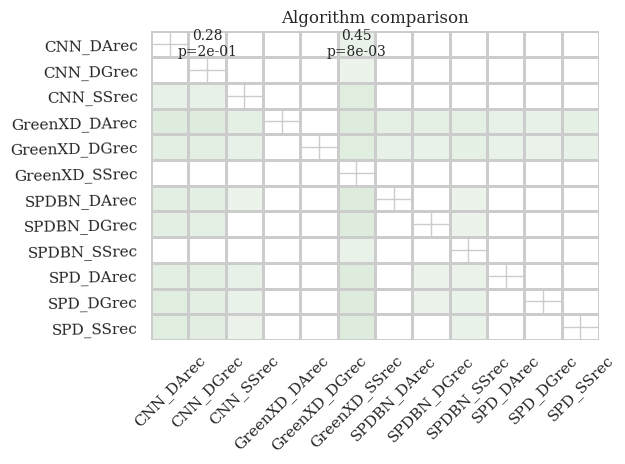

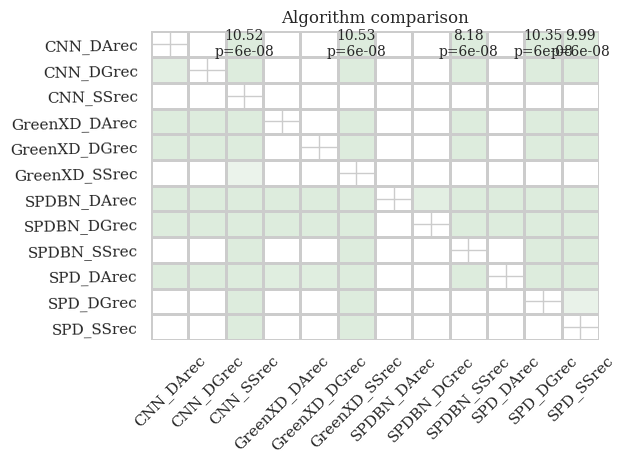

In [18]:
# stats = compute_dataset_statistics(results_all)
# P_all, T = find_significant_differences(stats)


# moabb_plt.summary_plot(P_all, T)
# plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats_tt = compute_dataset_statistics(results_rec_tt)
P_tt, T_tt = find_significant_differences(stats_tt)

moabb_plt.summary_plot(P_tt, T_tt)
plt.show()

# stats = compute_dataset_statistics(results_nor)
# P, T = find_significant_differences(stats)

# moabb_plt.summary_plot(P, T)
# plt.show()

In [19]:
P

CNN_DArec     CNN_DGrec  CNN_SSrec  GreenXD_DArec  \
CNN_DArec               NaN  1.700681e-01   0.999141       1.000000   
CNN_DGrec      8.299319e-01           NaN   0.999042       1.000000   
CNN_SSrec      8.586616e-04  9.577092e-04        NaN       0.999811   
GreenXD_DArec  5.960464e-08  5.960464e-08   0.000189            NaN   
GreenXD_DGrec  1.507998e-05  1.829863e-05   0.001177       0.625286   
GreenXD_SSrec  9.917967e-01  9.697865e-01   0.999999       1.000000   
SPDBN_DArec    1.507998e-05  1.233816e-05   0.025642       0.999908   
SPDBN_DGrec    1.507998e-05  1.966256e-04   0.096066       0.999816   
SPDBN_SSrec    3.186468e-01  1.903437e-01   0.789931       0.999897   
SPD_DArec      2.960530e-05  8.165836e-06   0.001072       0.999382   
SPD_DGrec      1.966953e-06  8.165836e-06   0.001947       0.998952   
SPD_SSrec      1.490116e-06  5.245209e-06   0.009122       0.999588   

               GreenXD_DGrec  GreenXD_SSrec  SPDBN_DArec  SPDBN_DGrec  \
CNN_DArec           0.999985   8.203328e-03     0.999985     0.999985   
CNN_DGrec           0.999982   3.021353e-02     0.999988     0.999803   
CNN_SSrec           0.998823   1.490116e-06     0.974358     0.903934   
GreenXD_DArec       0.374714   5.960464e-08     0.000092     0.000184   
GreenXD_DGrec            NaN   1.966953e-06     0.000619     0.002338   
GreenXD_SSrec       0.999998            NaN     1.000000     1.000000   
SPDBN_DArec         0.999381   5.960464e-08          NaN     0.462265   
SPDBN_DGrec         0.997662   5.960464e-08     0.537735          NaN   
SPDBN_SSrec         0.999716   7.522464e-03     0.963104     0.969068   
SPD_DArec           0.997430   5.960464e-08     0.112963     0.034894   
SPD_DGrec           0.988729   5.960464e-08     0.202871     0.019884   
SPD_SSrec           0.999000   5.960464e-08     0.448314     0.378795   

               SPDBN_SSrec  SPD_DArec  SPD_DGrec  SPD_SSrec  
CNN_DArec         0.681353   0.999970   0.999998   0.999999  
CNN_DGrec         0.809656   0.999992   0.999992   0.999995  
CNN_SSrec         0.210069   0.998928   0.998053   0.990878  
GreenXD_DArec     0.000103   0.000618   0.001048   0.000412  
GreenXD_DGrec     0.000284   0.002570   0.011271   0.001000  
GreenXD_SSrec     0.992478   1.000000   1.000000   1.000000  
SPDBN_DArec       0.036896   0.887037   0.797129   0.551686  
SPDBN_DGrec       0.030932   0.965106   0.980116   0.621205  
SPDBN_SSrec            NaN   0.986223   0.994364   0.994250  
SPD_DArec         0.013777        NaN   0.396971   0.165524  
SPD_DGrec         0.005636   0.603029        NaN   0.093186  
SPD_SSrec         0.005750   0.834476   0.906814        NaN

### get the interresting p-value

In [58]:


p_values_by_sort_nor = [P_all.iloc[4,0],P_all.iloc[4,1],P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[16,13],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7],P_all.iloc[7,6]]
p_values_by_sort_nor_sgf = [P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7]]


p_values_by_sort_rec = [P_all.iloc[5,3],P_all.iloc[5,2],P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]
p_values_by_sort_rec_sgf = [P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]


### Graph

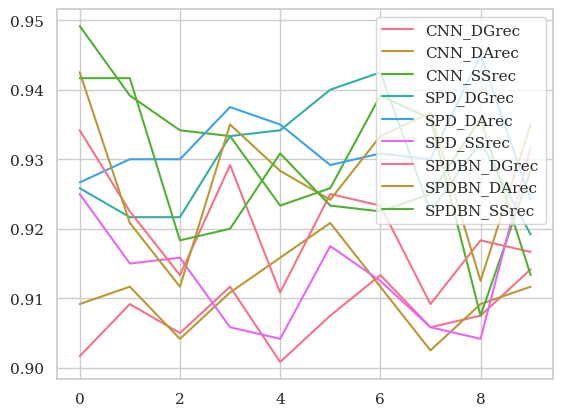

In [35]:
plt.figure()

for i,n in enumerate(names):
    plt.plot([np.mean(model_scores[i][k*12:(k+1)*12]) for k in range(10)],label=n)

plt.legend()
plt.show()

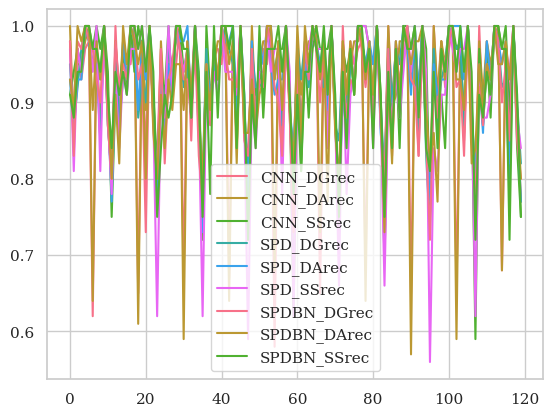

In [36]:
plt.figure()

for i,n in enumerate(names):
    plt.plot(model_scores[i],label=n)

plt.legend()
plt.show()

In [16]:
box_pairs_nor = [(("CNN", "CNN_SS"), ("CNN", "CNN_DG")),
                                 (("CNN", "CNN_SS"), ("CNN", "CNN_DA")),
                                 (("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                 (("SPDBN", "SPDBN_DA"), ("SPDBN", "SPDBN_DG")),
                                ]
box_pairs_nor_sgf = [(("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                ]

box_pairs_rec = [(("CNN", "CNN_SSrec"), ("CNN", "CNN_DGrec")),
                                 (("CNN", "CNN_SSrec"), ("CNN", "CNN_DArec")),
                                 (("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]
box_pairs_rec_sgf = [(("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
CNN_CNN_DArec v.s. CNN_CNN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.300e+01
Using zero_method  pratt
CNN_CNN_DGrec v.s. CNN_CNN_DArec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.800e+01
Using zero_method  pratt
SPD_SPD_DGrec v.s. SPD_SPD_DArec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.500e+01
Using zero_method  pratt
SPD_SPD_DArec v.s. SPD_SPD_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.850e-01 stat=9.000e+00


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  pratt
SPDBN_SPDBN_DArec v.s. SPDBN_SPDBN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.600e+01
Using zero_method  pratt
SPDBN_SPDBN_DGrec v.s. SPDBN_SPDBN_DArec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.150e+01
Using zero_method  pratt
CNN_CNN_DGrec v.s. CNN_CNN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=3.500e+01
Using zero_method  pratt
SPD_SPD_DGrec v.s. SPD_SPD_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.650e+01
Using zero_method  pratt
SPDBN_SPDBN_DGrec v.s. SPDBN_SPDBN_SSrec: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=2.900e+01


Text(0.5, 1.0, 'Accuracy score of differents pipelines')

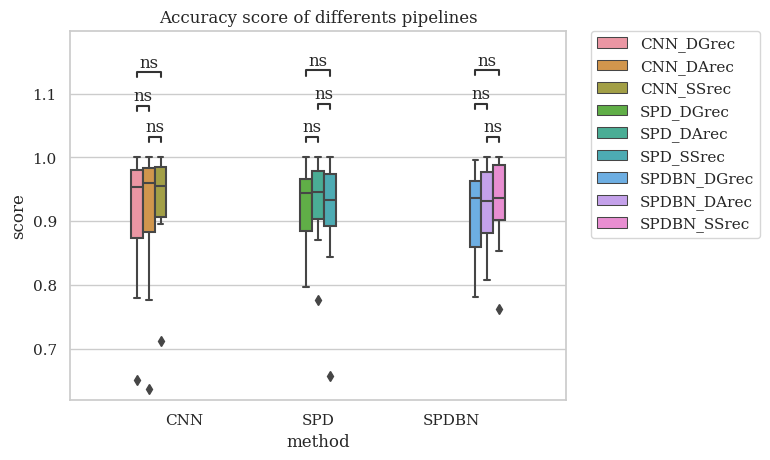

In [59]:
x = "method"
y = "score"
hue = "pipeline"

colors = mcolors.CSS4_COLORS

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_rec, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_rec, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec, test='Wilcoxon',
                    perform_stat_test=True, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(True,which='minor')
plt.title("Accuracy score of differents pipelines")

C:\Users\s.velut\AppData\Local\Temp\ipykernel_11796\547592038.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


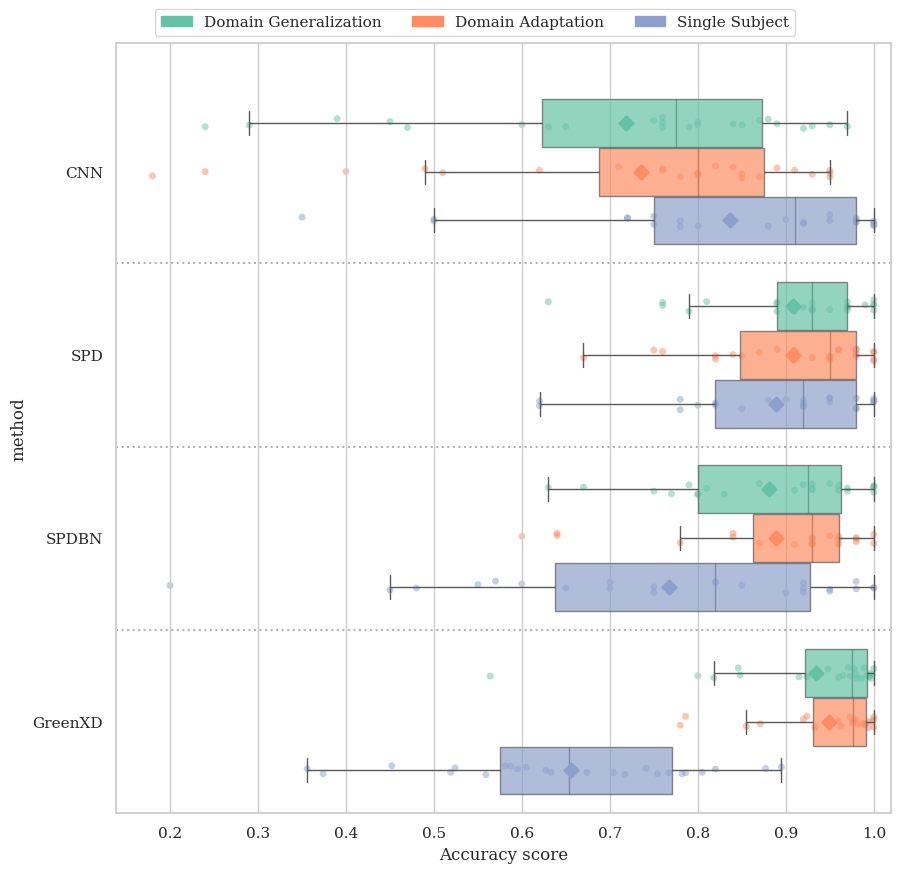

In [131]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS","DG","DA","SS","DG","DA","SS"],24),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*4))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_2872\4046069318.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


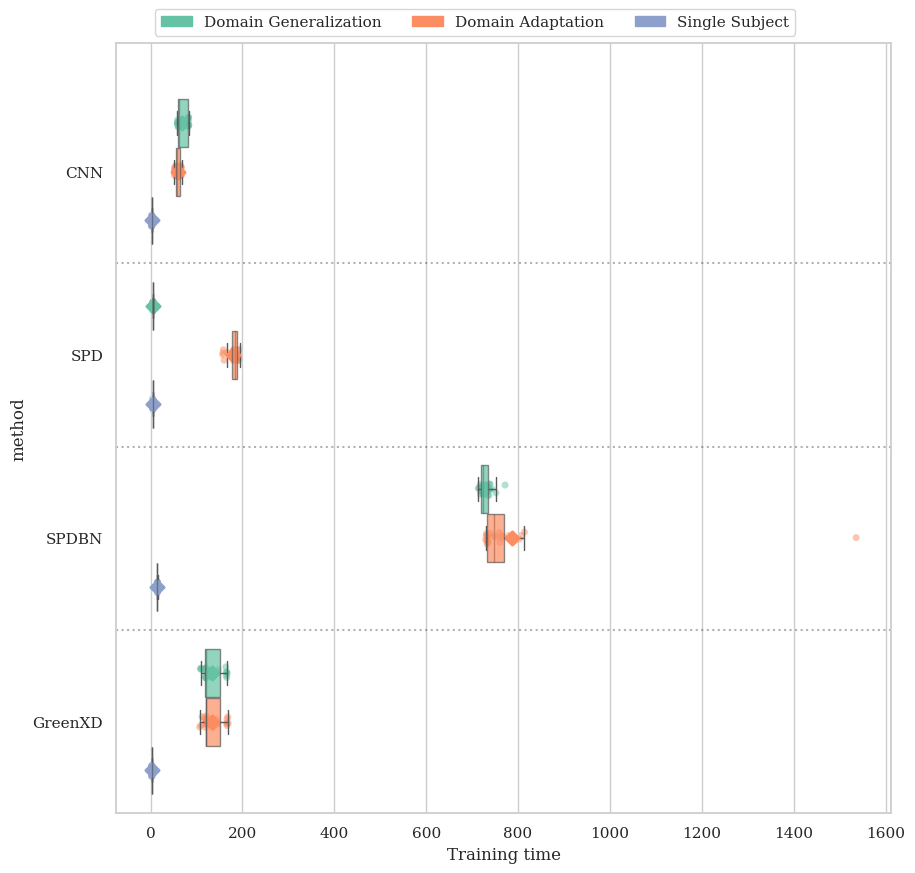

In [22]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec_tt.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS","DG","DA","SS","DG","DA","SS"],24),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*4))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Training time")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

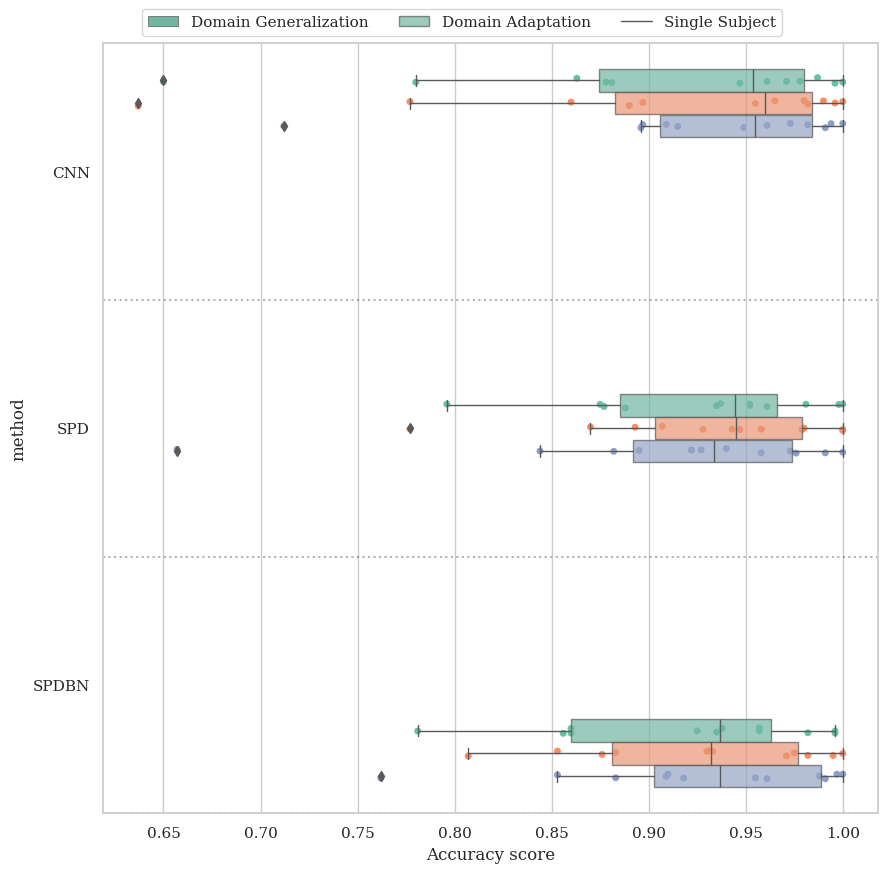

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x = "score"
y = "method"
hue = "pipeline"

sns.boxplot(data=results_rec,
            y=y,
            x=x,
            hue=hue,
            linewidth=boxplot_lw,
            whiskerprops=boxplot_props,
            medianprops=boxplot_props,
            palette=palette,
            ax=ax,
            dodge="auto",
            boxprops=dict(alpha=0.7),
            orient='h')

sns.stripplot(data=results_rec,
              y=y,
              x=x,
              hue=hue,
              ax=ax,
              dodge=True,
              linewidth=0,
              palette=palette,
              edgecolor='k',
              size=5,
              zorder=0,
              orient='h')

ax.yaxis.set_label_position("left")
# ax.yaxis.tick_right()

for i in range(3):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim([0.15, 1.02])
ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
             loc=(0.05, 1.01), ncols=n_pi)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_loo v.s. CNN_CNN_looa: Custom statistical test, P_val:5.000e-01
SPD_SPD_loo v.s. SPD_SPD_looa: Custom statistical test, P_val:5.000e-01
SPDBN_SPDBN_looa v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:5.000e-01
SPD_SPD_loo v.s. SPD_SPD_wt: Custom statistical test, P_val:5.000e-01
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:5.000e-01


ValueError: Length of values (108) does not match length of index (216)

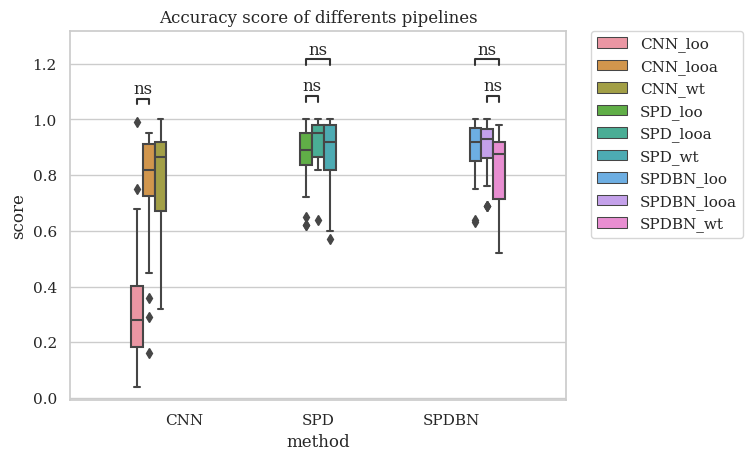

In [41]:
x = "method"
y = "score"
hue = "pipeline"

colors = mcolors.CSS4_COLORS

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_nor, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_nor, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_nor_sgf,
                    pvalues=p_values_by_sort_nor_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy score of differents pipelines")


temp = results_rec.copy()
temp.insert(1,"pipeline_renamed",np.repeat(["CNN DG","CNN DA","CNN SS","SPD DG","SPD DA","SPD SS","SPDBN DG","SPDBN DA","SPDBN SS"],12),True)

palettes = {"CNN DG":colors["deepskyblue"],"CNN DA":colors["firebrick"],"CNN SS":colors["forestgreen"],"SPD DG":colors["deepskyblue"],"SPD DA":colors["firebrick"],"SPD SS":colors["forestgreen"],
            "SPDBN DG":colors["deepskyblue"],"SPDBN DA":colors["firebrick"],"SPDBN SS":colors["forestgreen"]}

fig2 = plt.figure(2)
ax = sns.boxplot(data=temp, x=x, y=y, hue="pipeline_renamed",palette=palettes)
add_stat_annotation(ax, data=temp, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec_sgf,
                    pvalues=p_values_by_sort_rec_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.title("Accuracy score of differents pipelines")
ax.texts[0].set
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

temp = results_rec.copy()
temp.insert(1,"pipeline_renamed",np.repeat(["CNN DG","CNN DA","CNN SS","SPD DG","SPD DA","SPD SS","SPDBN DG","SPDBN DA","SPDBN SS"],12),True)

palettes = {"CNN DG":colors["deepskyblue"],"CNN DA":colors["firebrick"],"CNN SS":colors["forestgreen"],"SPD DG":colors["deepskyblue"],"SPD DA":colors["firebrick"],"SPD SS":colors["forestgreen"],
            "SPDBN DG":colors["deepskyblue"],"SPDBN DA":colors["firebrick"],"SPDBN SS":colors["forestgreen"]}

fig3 = plt.figure(3)
ax = sns.boxplot(data=temp, x=x, y=y, hue="pipeline_renamed",palette=palettes)
add_stat_annotation(ax, data=temp, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec_sgf,
                    pvalues=p_values_by_sort_rec_sgf,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
# plt.title("Accuracy score of differents pipelines")
DG_patch = mpatches.Patch(color=colors["deepskyblue"], label='Domain Generalization')
ax.set_xlabel("")
DA_patch = mpatches.Patch(color=colors["firebrick"], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=colors["forestgreen"], label='Single Subject')
plt.legend(handles=[DG_patch,DA_patch,SS_patch], loc=2, borderaxespad=0.)

NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


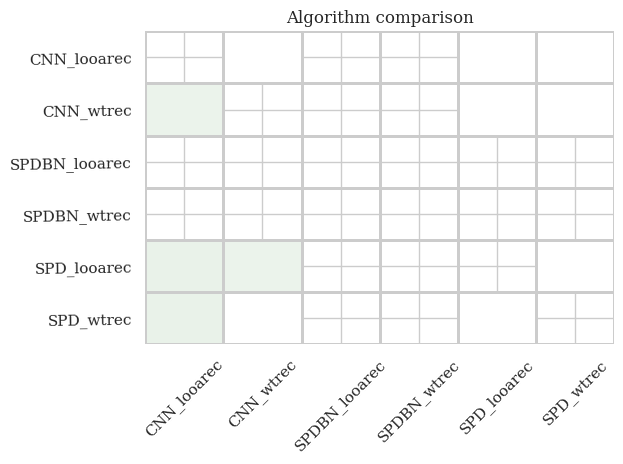

CNN_looarec  CNN_wtrec  SPDBN_looarec  SPDBN_wtrec  \
CNN_looarec            NaN   0.955313            NaN          NaN   
CNN_wtrec         0.047548        NaN            NaN          NaN   
SPDBN_looarec          NaN        NaN            NaN          NaN   
SPDBN_wtrec            NaN        NaN            NaN          NaN   
SPD_looarec       0.006890   0.022840            NaN          NaN   
SPD_wtrec         0.006890   0.187375            NaN          NaN   

               SPD_looarec  SPD_wtrec  
CNN_looarec        0.99311   0.993110  
CNN_wtrec          0.97716   0.812625  
SPDBN_looarec          NaN        NaN  
SPDBN_wtrec            NaN        NaN  
SPD_looarec            NaN   0.263530  
SPD_wtrec          0.73647        NaN

In [33]:
best_results = results_rec.loc[results_rec['pipeline'].isin(["CNN_SSrec","SPD_DArec","SPDBN_SSrec","SPDBN_DArec","CNN_DArec","SPD_SSrec"])]
stats = compute_dataset_statistics(best_results)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()
P

## tps_ test

In [60]:
CNN_DG_v = np.concatenate(CNN_DG_tst.values)
CNN_DA_v = np.concatenate(CNN_DA_tst.values)
CNN_SS_v = np.concatenate(CNN_SS_tst.values)
CNN_DGrec_v = np.concatenate(CNN_DGrec_tst.values)
CNN_DArec_v = np.concatenate(CNN_DArec_tst.values)
CNN_SSrec_v = np.concatenate(CNN_SSrec_tst.values)

SPD_DG_v = np.concatenate(SPD_DG_tst.values)
SPD_DA_v = np.concatenate(SPD_DA_tst.values)
SPD_SS_v = np.concatenate(SPD_SS_tst.values)
SPD_DGrec_v = np.concatenate(SPD_DGrec_tst.values)
SPD_DArec_v = np.concatenate(SPD_DArec_tst.values)
SPD_SSrec_v = np.concatenate(SPD_SSrec_tst.values)

# SPDBN_DG_v = np.concatenate(SPDBN_DG_tst.values)
# SPDBN_DA_v = np.concatenate(SPDBN_DA_tst.values)
# SPDBN_SS_v = np.concatenate(SPDBN_SS_tst.values)
# SPDBN_DGrec_v = np.concatenate(SPDBN_DGrec_tst.values)
# SPDBN_DArec_v = np.concatenate(SPDBN_DArec_tst.values)
# SPDBN_SSrec_v = np.concatenate(SPDBN_SSrec_tst.values)

n_train_DG = 26400
n_train_DA = 27040
n_train_SS = 1120

n_test_DG = 7020
n_test_DA = 5148
n_test_SS = 3744

In [61]:
CNN_DG_v_mean = CNN_DG_tst.mean(axis=0).values
CNN_DA_v_mean = CNN_DA_tst.mean(axis=0).values
CNN_SS_v_mean = CNN_SS_tst.mean(axis=0).values
CNN_DGrec_v_mean = CNN_DGrec_tst.mean(axis=0).values
CNN_DArec_v_mean = CNN_DArec_tst.mean(axis=0).values
CNN_SSrec_v_mean = CNN_SSrec_tst.mean(axis=0).values

SPD_DG_v_mean = SPD_DG_tst.mean(axis=0).values
SPD_DA_v_mean = SPD_DA_tst.mean(axis=0).values
SPD_SS_v_mean = SPD_SS_tst.mean(axis=0).values
SPD_DGrec_v_mean = SPD_DGrec_tst.mean(axis=0).values
SPD_DArec_v_mean = SPD_DArec_tst.mean(axis=0).values
SPD_SSrec_v_mean = SPD_SSrec_tst.mean(axis=0).values

# SPDBN_DG_v_mean = SPDBN_DG_tst.mean(axis=0).values
# SPDBN_DA_v_mean = SPDBN_DA_tst.mean(axis=0).values
# SPDBN_SS_v_mean = SPDBN_SS_tst.mean(axis=0).values
# SPDBN_DGrec_v_mean = SPDBN_DGrec_tst.mean(axis=0).values
# SPDBN_DArec_v_mean = SPDBN_DArec_tst.mean(axis=0).values
# SPDBN_SSrec_v_mean = SPDBN_SSrec_tst.mean(axis=0).values

In [62]:
model_scores = [CNN_DG_v,CNN_DA_v,CNN_SS_v,CNN_DGrec_v,CNN_DArec_v,CNN_SSrec_v,
                SPD_DG_v,SPD_DA_v,SPD_SS_v,SPD_DGrec_v,SPD_DArec_v,SPD_SSrec_v,
                SPDBN_DG_v,SPDBN_DA_v,SPDBN_SS_v,SPDBN_DGrec_v,SPDBN_DArec_v,SPDBN_SSrec_v
                ]
model_scores_mean = [CNN_DG_v_mean,CNN_DA_v_mean,CNN_SS_v_mean,CNN_DGrec_v_mean,CNN_DArec_v_mean,CNN_SSrec_v_mean,
                     SPD_DG_v_mean,SPD_DA_v_mean,SPD_SS_v_mean,SPD_DGrec_v_mean,SPD_DArec_v_mean,SPD_SSrec_v_mean,
                     SPDBN_DG_v_mean,SPDBN_DA_v_mean,SPDBN_SS_v_mean,SPDBN_DGrec_v_mean,SPDBN_DArec_v_mean,SPDBN_SSrec_v_mean
                     ]
names = ["CNN_DG","CNN_DA","CNN_SS","CNN_DGrec","CNN_DArec","CNN_SSrec",
         "SPD_DG","SPD_DA","SPD_SS","SPD_DGrec","SPD_DArec","SPD_SSrec",
         "SPDBN_DG","SPDBN_DA","SPDBN_SS","SPDBN_DGrec","SPDBN_DArec","SPDBN_SSrec"
         ]
list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,
                n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,
               n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

In [65]:
print("median of each fold for CNN_DG:\n",np.median(CNN_DG_tst.median(axis=0)))
print("median of each fold for CNN_DA:\n",np.median(CNN_DA_tst.median(axis=0)))
print("median of each fold for CNN_SS:\n",np.median(CNN_SS_tst.median(axis=0)))
print("median of each fold for CNN_DGrec:\n",np.median(CNN_DGrec_tst.median(axis=0)))
print("median of each fold for CNN_DArec:\n",np.median(CNN_DArec_tst.median(axis=0)))
print("median of each fold for CNN_SSrec:\n",np.median(CNN_SSrec_tst.median(axis=0)))

print("median of each fold for SPD_DG:\n",np.median(SPD_DG_tst.median(axis=0)))
print("median of each fold for SPD_DA:\n",np.median(SPD_DA_tst.median(axis=0)))
print("median of each fold for SPD_SS:\n",np.median(SPD_SS_tst.median(axis=0)))
print("median of each fold for SPD_DGrec:\n",np.median(SPD_DGrec_tst.median(axis=0)))
print("median of each fold for SPD_DArec:\n",np.median(SPD_DArec_tst.median(axis=0)))
print("median of each fold for SPD_SSrec:\n",np.median(SPD_SSrec_tst.median(axis=0)))

median of each fold for CNN_loo:
 124.09116452932358
median of each fold for CNN_looa:
 131.10714834928513
median of each fold for CNN_wt:
 5.205158531665802
median of each fold for CNN_loorec:
 128.72221142053604
median of each fold for CNN_looarec:
 138.39941775798798
median of each fold for CNN_wtrec:
 4.085517406463623
median of each fold for SPD_loo:
 284.1686170697212
median of each fold for SPD_looa:
 317.1602498292923
median of each fold for SPD_wt:
 10.392297327518463
median of each fold for SPD_loorec:
 310.8442229628563
median of each fold for SPD_looarec:
 362.78015553951263
median of each fold for SPD_wtrec:
 10.51542180776596


### Through MOABB

In [63]:
results_all = pd.DataFrame()
results_rec = pd.DataFrame()
results_nor = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],
                   "n_samples":list_n_train[i],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results = results.append(new_row, ignore_index=True)
        if (i//3) % 2 == 0:
            results_nor = results_nor.append(new_row, ignore_index=True)
        else:
            results_rec = results_rec.append(new_row, ignore_index=True)

NameError: name 'results' is not defined

In [77]:
results

dataset  subject  session  score  n_samples  n_channels     pipeline  \
0    BurstVEP        0        1  0.874      26400          32      CNN_loo   
1    BurstVEP        1        1  0.874      26400          32      CNN_loo   
2    BurstVEP        2        1  0.875      26400          32      CNN_loo   
3    BurstVEP        3        1  0.903      26400          32      CNN_loo   
4    BurstVEP        4        1  0.911      26400          32      CNN_loo   
..        ...      ...      ...    ...        ...         ...          ...   
643  BurstVEP        7        1  0.979       1120          32  SPDBN_wtrec   
644  BurstVEP        8        1  0.895       1120          32  SPDBN_wtrec   
645  BurstVEP        9        1  0.994       1120          32  SPDBN_wtrec   
646  BurstVEP       10        1  0.903       1120          32  SPDBN_wtrec   
647  BurstVEP       11        1  0.716       1120          32  SPDBN_wtrec   

    method  
0      CNN  
1      CNN  
2      CNN  
3      CNN  
4      CNN  
..     ...  
643  SPDBN  
644  SPDBN  
645  SPDBN  
646  SPDBN  
647  SPDBN  

[648 rows x 8 columns]

In [ ]:
fig1 = moabb_plt.paired_plot(results, "CNN_DG", "CNN_SS")
fig2 = moabb_plt.paired_plot(results, "CNN_DA", "CNN_SS")
fig3 = moabb_plt.paired_plot(results, "SPD_SS", "CNN_SS")
fig1 = moabb_plt.paired_plot(results, "SPD_DG", "SPD_SS")
fig2 = moabb_plt.paired_plot(results, "SPD_DA", "SPD_SS")
fig3 = moabb_plt.paired_plot(results, "SPD_SS", "SPDBN_SS")
fig2 = moabb_plt.paired_plot(results, "SPDBN_DA", "SPDBN_SS")
fig3 = moabb_plt.paired_plot(results, "SPDBN_DG", "SPDBN_SS")
plt.show()

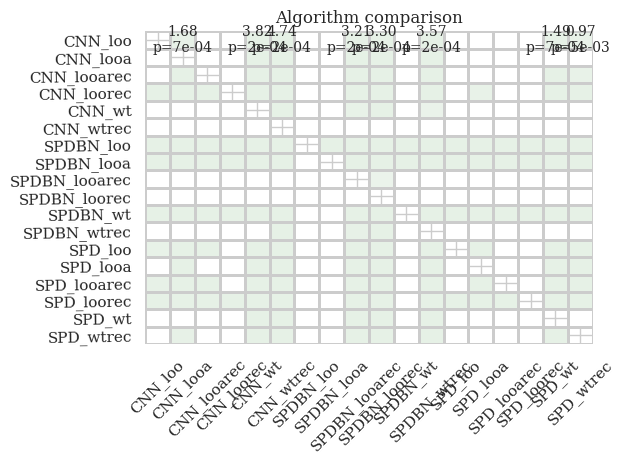

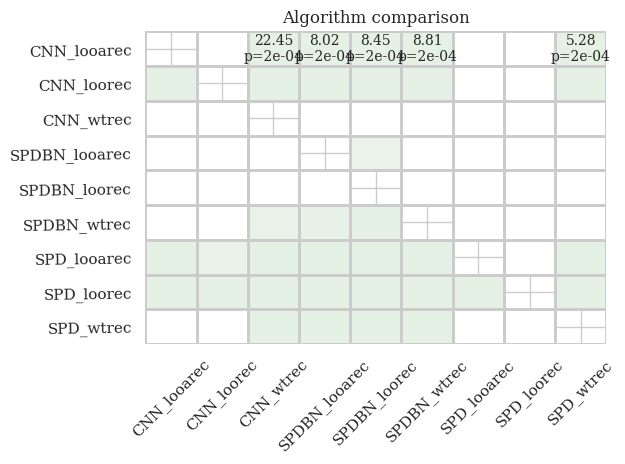

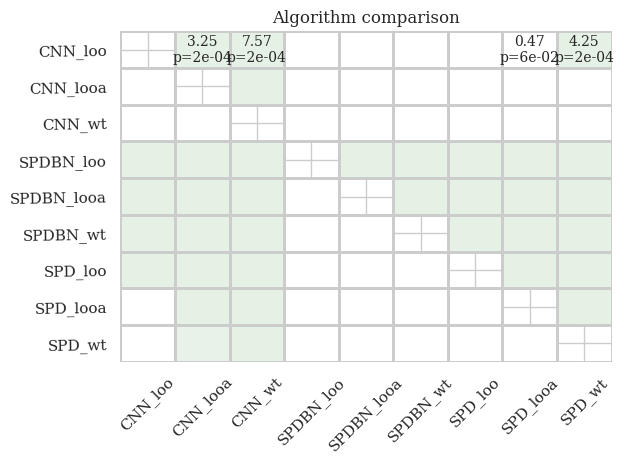

In [82]:
stats = compute_dataset_statistics(results)
P_all, T_all = find_significant_differences(stats)

moabb_plt.summary_plot(P_all, T_all)
plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats = compute_dataset_statistics(results_nor)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

In [98]:
P_all = P_all.transpose()

In [99]:
p_values_by_sort_nor = [P_all.iloc[4,0],P_all.iloc[4,1],P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[16,13],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7],P_all.iloc[7,6]]
p_values_by_sort_nor_sgf = [P_all.iloc[1,0],
                    P_all.iloc[16,12],P_all.iloc[13,12],
                    P_all.iloc[10,6],P_all.iloc[10,7]]


p_values_by_sort_rec = [P_all.iloc[5,3],P_all.iloc[5,2],P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]
p_values_by_sort_rec_sgf = [P_all.iloc[2,3],
                    P_all.iloc[17,15],P_all.iloc[17,14],P_all.iloc[14,15],
                    P_all.iloc[11,9],P_all.iloc[11,8],P_all.iloc[8,9]]


### Graph

In [100]:
box_pairs_nor = [(("CNN", "CNN_SS"), ("CNN", "CNN_DG")),
                                 (("CNN", "CNN_SS"), ("CNN", "CNN_DA")),
                                 (("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DA")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                 (("SPDBN", "SPDBN_DA"), ("SPDBN", "SPDBN_DG")),
                                ]
box_pairs_nor_sgf = [(("CNN", "CNN_DA"), ("CNN", "CNN_DG")),
                                 (("SPD", "SPD_SS"), ("SPD", "SPD_DG")),
                                 (("SPD", "SPD_DA"), ("SPD", "SPD_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DG")),
                                 (("SPDBN", "SPDBN_SS"), ("SPDBN", "SPDBN_DA")),
                                ]

box_pairs_rec = [(("CNN", "CNN_SSrec"), ("CNN", "CNN_DGrec")),
                                 (("CNN", "CNN_SSrec"), ("CNN", "CNN_DArec")),
                                 (("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]
box_pairs_rec_sgf = [(("CNN", "CNN_DArec"), ("CNN", "CNN_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DGrec")),
                                 (("SPD", "SPD_SSrec"), ("SPD", "SPD_DArec")),
                                 (("SPD", "SPD_DArec"), ("SPD", "SPD_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DGrec")),
                                 (("SPDBN", "SPDBN_SSrec"), ("SPDBN", "SPDBN_DArec")),
                                 (("SPDBN", "SPDBN_DArec"), ("SPDBN", "SPDBN_DGrec")),
                                ]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_looa v.s. CNN_CNN_wt: Custom statistical test, P_val:4.883e-04
CNN_CNN_loo v.s. CNN_CNN_looa: Custom statistical test, P_val:7.324e-04
SPD_SPD_loo v.s. SPD_SPD_looa: Custom statistical test, P_val:2.441e-04
SPD_SPD_looa v.s. SPD_SPD_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_looa v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_looa: Custom statistical test, P_val:2.441e-04
CNN_CNN_loo v.s. CNN_CNN_wt: Custom statistical test, P_val:2.441e-04
SPD_SPD_loo v.s. SPD_SPD_wt: Custom statistical test, P_val:2.441e-04
SPDBN_SPDBN_loo v.s. SPDBN_SPDBN_wt: Custom statistical test, P_val:2.441e-04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN_CNN_l

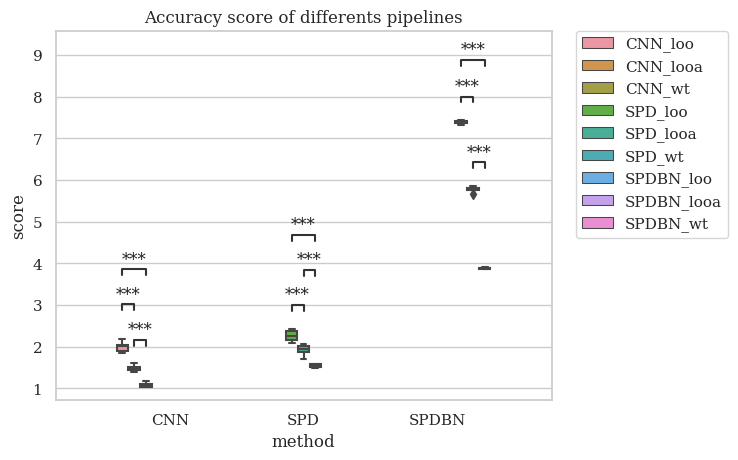

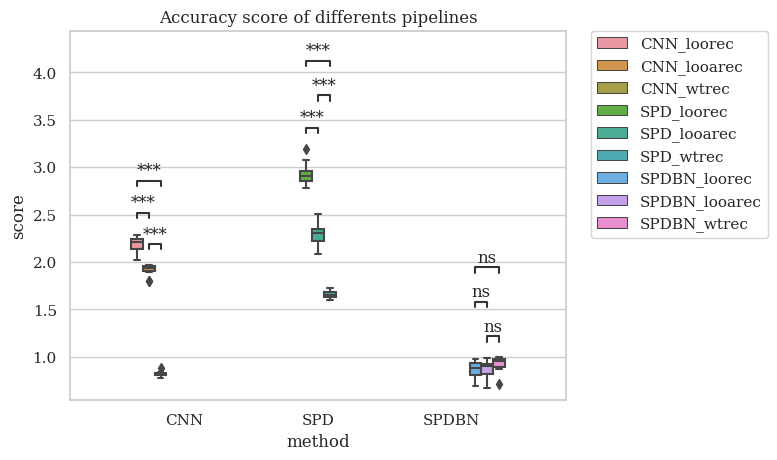

In [101]:
x = "method"
y = "score"
hue = "pipeline"

fig1 = plt.figure(1)
ax = sns.boxplot(data=results_nor, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_nor, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_nor,
                    pvalues=p_values_by_sort_nor,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Accuracy score of differents pipelines")

fig2 = plt.figure(2)
ax = sns.boxplot(data=results_rec, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=results_rec, x=x, y=y, hue=hue,
                    box_pairs=box_pairs_rec,
                    pvalues=p_values_by_sort_rec,
                    perform_stat_test=False, text_format='star', loc='inside', verbose=2)
plt.title("Accuracy score of differents pipelines")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## All in one

In [121]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores[model_i]
    model_k_scores = model_scores[model_k]
    differences = model_i_scores - model_k_scores

    n = differences.shape[0]  # number of test sets
    df = n - 1

    n_train = int((list_n_train[model_i] + list_n_train[model_k])/2)
    n_test = int((list_n_test[model_i] + list_n_test[model_k])/2)

    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    # p_val *= n_comparisons  # implement Bonferroni correction
    # # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [names[model_i], names[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

model_1     model_2  t_stat  p_val
0      CNN_loo    CNN_looa  -0.733  0.232
1      CNN_loo      CNN_wt  -0.706  0.241
2      CNN_loo     SPD_loo  -0.375  0.354
3      CNN_loo    SPD_looa  -0.777  0.219
4      CNN_loo      SPD_wt  -0.473  0.319
5      CNN_loo   SPDBN_loo   0.333  0.370
6      CNN_loo  SPDBN_looa   0.076  0.470
7      CNN_loo    SPDBN_wt  -0.785  0.217
8     CNN_looa      CNN_wt  -0.225  0.411
9     CNN_looa     SPD_loo   0.305  0.380
10    CNN_looa    SPD_looa  -0.160  0.436
11    CNN_looa      SPD_wt  -0.036  0.486
12    CNN_looa   SPDBN_loo   0.906  0.183
13    CNN_looa  SPDBN_looa   0.670  0.252
14    CNN_looa    SPDBN_wt  -0.453  0.326
15      CNN_wt     SPD_loo   0.782  0.218
16      CNN_wt    SPD_looa   0.242  0.405
17      CNN_wt      SPD_wt   0.103  0.459
18      CNN_wt   SPDBN_loo   1.081  0.141
19      CNN_wt  SPDBN_looa   0.797  0.214
20      CNN_wt    SPDBN_wt  -0.071  0.472
21     SPD_loo    SPD_looa  -0.921  0.179
22     SPD_loo      SPD_wt  -0.482  0.315
23     SPD_loo   SPDBN_loo   0.766  0.222
24     SPD_loo  SPDBN_looa   0.481  0.316
25     SPD_loo    SPDBN_wt  -0.983  0.164
26    SPD_looa      SPD_wt   0.128  0.449
27    SPD_looa   SPDBN_loo   1.293  0.099
28    SPD_looa  SPDBN_looa   0.930  0.177
29    SPD_looa    SPDBN_wt  -0.618  0.269
30      SPD_wt   SPDBN_loo   0.854  0.197
31      SPD_wt  SPDBN_looa   0.669  0.253
32      SPD_wt    SPDBN_wt  -0.202  0.420
33   SPDBN_loo  SPDBN_looa  -0.212  0.416
34   SPDBN_loo    SPDBN_wt  -1.145  0.127
35  SPDBN_looa    SPDBN_wt  -0.934  0.176

In [142]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores[model_i]
    model_k_scores = model_scores[model_k]
    differences = model_i_scores - model_k_scores

    n = differences.shape[0]  # number of test sets
    df = n - 1

    n_train = int((list_n_train[model_i] + list_n_train[model_k])/2)
    n_test = int((list_n_test[model_i] + list_n_test[model_k])/2)

    t_stat, p_val = scipy.stats.ttest_ind(model_i_scores,model_k_scores,equal_var=False)
    # p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [names[model_i], names[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

model_1      model_2  t_stat  p_val
0       CNN_loo     CNN_looa  -2.810  0.005
1       CNN_loo       CNN_wt  -4.156  0.000
2       CNN_loo   CNN_loorec  -2.115  0.035
3       CNN_loo  CNN_looarec  -3.289  0.001
4       CNN_loo    CNN_wtrec  -4.642  0.000
..          ...          ...     ...    ...
100   SPD_wtrec   SPDBN_looa   4.151  0.000
101   SPD_wtrec     SPDBN_wt  -0.137  0.891
102   SPDBN_loo   SPDBN_looa  -0.923  0.357
103   SPDBN_loo     SPDBN_wt  -5.845  0.000
104  SPDBN_looa     SPDBN_wt  -4.257  0.000

[105 rows x 4 columns]

In [145]:
p_scores = np.ones((15,15))
start_idx = 0
for k in range(15,0,-1):
    p_scores[15-k,15-k+1:] = pairwise_comp_df.iloc[start_idx:start_idx+k-1,3]
    start_idx += k-1

p_scores = p_scores.transpose()
p_scores

array([[1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.005, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.232, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.035, 0.464, 0.047, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.001, 0.659, 0.455, 0.234, 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.068, 0.453, 0.01 , 0.157, 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.082, 0.249, 0.014, 0.679, 0.104, 0.002, 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.001, 0.618, 0.446, 0.198, 0.974, 0.143, 0.08 , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.004, 0.868, 0.

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:262: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


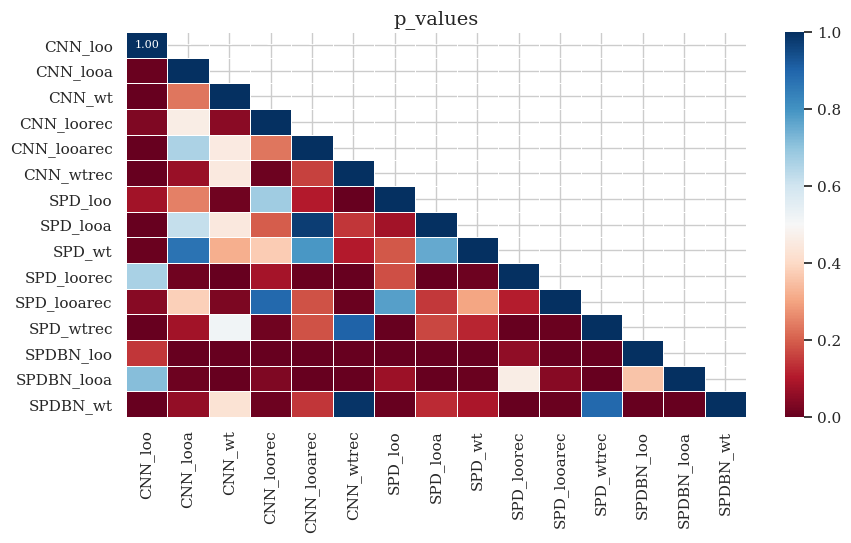

In [146]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("p_values", fontsize=14)

mask = np.zeros_like(p_scores, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Generate the heatmap including the mask
heatmap = sns.heatmap(p_scores,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # the mask has been included here
                      xticklabels=names,
                      yticklabels=names,
                      ax=ax)

# Display our plot
plt.show()

## test SS CNN / SPD

In [58]:
differences = CNN_SS_v - SPD_SS_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_SS
n_test = n_test_SS

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.103
Corrected p-value: 0.459


In [59]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_SS_v,SPD_SS_v,equal_var=False)


Uncorrected t-value: 2.066
Uncorrected p-value: 0.020


Ttest_indResult(statistic=1.0021328518901647, pvalue=0.3173364892726997)

## test DG CNN / SPD

In [60]:
differences = CNN_DG_v - SPD_DG_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DG
n_test = n_test_DG

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.375
Corrected p-value: 0.354


In [61]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DG_v,SPD_DG_v,equal_var=False)


Uncorrected t-value: -2.153
Uncorrected p-value: 0.017


Ttest_indResult(statistic=-1.7448060172939428, pvalue=0.08232743328844182)

## test DA CNN / SPD

In [62]:
differences = CNN_DA_v - SPD_DA_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DA
n_test = n_test_DA

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.160
Corrected p-value: 0.436


In [63]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DA_v,SPD_DA_v,equal_var=False)

Uncorrected t-value: -0.784
Uncorrected p-value: 0.217


Ttest_indResult(statistic=-0.49871633980158486, pvalue=0.6184523377337583)

## test SS CNN / SPDBN

In [64]:
differences = CNN_SS_v - SPDBN_SS_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_SS
n_test = n_test_SS

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.071
Corrected p-value: 0.472


In [65]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_SS_v,SPDBN_SS_v,equal_var=False)


Uncorrected t-value: -1.421
Uncorrected p-value: 0.079


Ttest_indResult(statistic=-0.792722147644561, pvalue=0.4287305977010901)

## test DG CNN / SPDBN

In [66]:
differences = CNN_DG_v - SPDBN_DG_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DG
n_test = n_test_DG

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.333
Corrected p-value: 0.370


In [67]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DG_v,SPDBN_DG_v,equal_var=False)


Uncorrected t-value: 1.908
Uncorrected p-value: 0.029


Ttest_indResult(statistic=1.4717858681179092, pvalue=0.14244123942633424)

## test DA CNN / SPDBN

In [68]:
differences = CNN_DA_v - SPDBN_DA_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DA
n_test = n_test_DA

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.670
Corrected p-value: 0.252


In [69]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(CNN_DA_v,SPDBN_DA_v,equal_var=False)

Uncorrected t-value: 3.273
Uncorrected p-value: 0.001


Ttest_indResult(statistic=2.6953646696186486, pvalue=0.007606903159761997)

## test SS SPDBN / SPD

In [70]:
differences = SPDBN_SS_v - SPD_SS_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_SS
n_test = n_test_SS

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.202
Corrected p-value: 0.420


In [71]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_SS_v,SPD_SS_v,equal_var=False)


Uncorrected t-value: 4.051
Uncorrected p-value: 0.000


Ttest_indResult(statistic=1.6984990387107397, pvalue=0.09075225889331986)

## test DG SPDBN / SPD

In [72]:
differences = SPDBN_DG_v - SPD_DG_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DG
n_test = n_test_DG

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.766
Corrected p-value: 0.222


In [73]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_DG_v,SPD_DG_v,equal_var=False)


Uncorrected t-value: -4.397
Uncorrected p-value: 0.000


Ttest_indResult(statistic=-3.1065157512724224, pvalue=0.0021427886034054394)

## test DA SPDBN / SPD

In [74]:
differences = SPDBN_DA_v - SPD_DA_v

n = differences.shape[0]  # number of test sets
df = n - 1

n_train = n_train_DA
n_test = n_test_DA

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: -0.930
Corrected p-value: 0.177


In [75]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)
scipy.stats.ttest_ind(SPDBN_DA_v,SPD_DA_v,equal_var=False)

Uncorrected t-value: -4.543
Uncorrected p-value: 0.000


Ttest_indResult(statistic=-3.202195076606427, pvalue=0.0016013243814845344)

# Other

### score code

In [21]:
df0_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_0.csv",index_col=0)
df1_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_1.csv",index_col=0)
df2_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_2.csv",index_col=0)
df3_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_0.csv",index_col=0)
df4_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_4.csv",index_col=0)
df5_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_5.csv",index_col=0)
df6_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_6.csv",index_col=0)
df7_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_7.csv",index_col=0)
df8_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_8.csv",index_col=0)
df9_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_9.csv",index_col=0)
df10_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_10.csv",index_col=0)
df11_SS = pd.read_csv("../results/score_code/SPDBN/SPDBN_SS_score_code_recentered_11.csv",index_col=0)

df0_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_0.csv",index_col=0)
df1_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_1.csv",index_col=0)
df2_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_2.csv",index_col=0)
df3_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_0.csv",index_col=0)
df4_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_4.csv",index_col=0)
df5_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_5.csv",index_col=0)
df6_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_6.csv",index_col=0)
df7_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_7.csv",index_col=0)
df8_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_8.csv",index_col=0)
df9_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_9.csv",index_col=0)
df10_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_10.csv",index_col=0)
df11_DG = pd.read_csv("../results/score_code/SPDBN/SPDBN_DG_score_code_recentered_11.csv",index_col=0)

df0_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_0.csv",index_col=0)
df1_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_1.csv",index_col=0)
df2_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_2.csv",index_col=0)
df3_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_0.csv",index_col=0)
df4_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_4.csv",index_col=0)
df5_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_5.csv",index_col=0)
df6_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_6.csv",index_col=0)
df7_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_7.csv",index_col=0)
df8_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_8.csv",index_col=0)
df9_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_9.csv",index_col=0)
df10_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_10.csv",index_col=0)
df11_DA = pd.read_csv("../results/score_code/SPDBN/SPDBN_DA_score_code_recentered_11.csv",index_col=0)

In [23]:
df_SS = pd.concat([df0_SS,df1_SS,df2_SS,df3_SS,df4_SS,df5_SS,df6_SS,df7_SS,df8_SS,df9_SS,df10_SS,df11_SS], axis=1, ignore_index=True)
df_DG = pd.concat([df0_DG,df1_DG,df2_DG,df3_DG,df4_DG,df5_DG,df6_DG,df7_DG,df8_DG,df9_DG,df10_DG,df11_DG], axis=1, ignore_index=True)
df_DA = pd.concat([df0_DA,df1_DA,df2_DA,df3_DA,df4_DA,df5_DA,df6_DA,df7_DA,df8_DA,df9_DA,df10_DA,df11_DA], axis=1, ignore_index=True)

print(df_SS.mean(axis=0).mean())
print(SPDBN_SS_sc.mean(axis=0).mean())

0.9238333333333334
0.9083333333333332


In [30]:
df_SS.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DG.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DA.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_SS.to_csv("./results/score_code/SPDBN_SS_score_code_recentered.csv")
df_DG.to_csv("./results/score_code/SPDBN_DG_score_code_recentered.csv")
df_DA.to_csv("./results/score_code/SPDBN_DA_score_code_recentered.csv")

In [26]:
print(df_DG.mean(axis=0))
print(SPDBN_DG_sc.mean(axis=0))

0     0.895
1     0.818
2     0.923
3     0.895
4     0.964
5     0.977
6     0.844
7     0.952
8     0.730
9     0.872
10    0.786
11    0.693
dtype: float64
1     0.854
2     0.834
3     0.860
4     0.737
5     0.873
6     0.969
7     0.797
8     0.773
9     0.728
10    0.986
11    0.793
12    0.612
dtype: float64


In [28]:
print(df_DA.mean(axis=0).mean())
print(SPDBN_DA_sc.mean(axis=0).mean())

0.8759166666666666
0.836


### tps test

In [68]:
df0_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_0.csv",index_col=0)
df1_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_1.csv",index_col=0)
df2_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_2.csv",index_col=0)
df3_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_0.csv",index_col=0)
df4_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_4.csv",index_col=0)
df5_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_5.csv",index_col=0)
df6_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_6.csv",index_col=0)
df7_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_7.csv",index_col=0)
df8_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_8.csv",index_col=0)
df9_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_9.csv",index_col=0)
df10_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_10.csv",index_col=0)
df11_SS = pd.read_csv("../results/tps_test/SPDBN/SPDBN_SS_tps_test_recentered_11.csv",index_col=0)

df0_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_0.csv",index_col=0)
df1_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_1.csv",index_col=0)
df2_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_2.csv",index_col=0)
df3_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_0.csv",index_col=0)
df4_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_4.csv",index_col=0)
df5_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_5.csv",index_col=0)
df6_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_6.csv",index_col=0)
df7_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_7.csv",index_col=0)
df8_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_8.csv",index_col=0)
df9_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_9.csv",index_col=0)
df10_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_10.csv",index_col=0)
df11_DG = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DG_tps_test_recentered_11.csv",index_col=0)

df0_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_0.csv",index_col=0)
df1_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_1.csv",index_col=0)
df2_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_2.csv",index_col=0)
df3_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_0.csv",index_col=0)
df4_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_4.csv",index_col=0)
df5_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_5.csv",index_col=0)
df6_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_6.csv",index_col=0)
df7_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_7.csv",index_col=0)
df8_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_8.csv",index_col=0)
df9_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_9.csv",index_col=0)
df10_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_10.csv",index_col=0)
df11_DA = pd.read_csv("../results/tps_test/SPDBN/SPDBN_DA_tps_test_recentered_11.csv",index_col=0)

In [71]:
df_SS.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DG.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_DA.rename({"0":"1","1":"2","2":"3","3":"4","4":"5","5":"6","6":"7","7":"8","8":"9","9":"10","10":"11"})
df_SS.to_csv("../results/tps_test/SPDBN_SS_tps_test_recentered.csv")
df_DG.to_csv("../results/tps_test/SPDBN_DG_tps_test_recentered.csv")
df_DA.to_csv("../results/tps_test/SPDBN_DA_tps_test_recentered.csv")

# GREEN

In [10]:

# Green_DGrec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_DG_score_code_0.35_recentered.csv",index_col=0)
# Green_DArec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_DA_score_code_0.35_recentered.csv",index_col=0)
# Green_SSrec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_SS_score_code_0.35_recentered.csv",index_col=0)

GreenXD_DGrec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_DG_Xdawn_score_code_0.35_recentered.csv",index_col=0)
GreenXD_DArec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_DA_Xdawn_score_code_0.35_recentered.csv",index_col=0)
GreenXD_SSrec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_SS_Xdawn_score_code_0.35_recentered.csv",index_col=0)

Green25_DGrec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_DG_Xdawn_score_code_0.25_recentered.csv",index_col=0)
Green25_DArec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_DA_Xdawn_score_code_0.25_recentered.csv",index_col=0)
Green25_SSrec_sc = pd.read_csv("./Wavelets/Green_files/results/score_code/Green_SS_Xdawn_score_code_0.25_recentered.csv",index_col=0)

In [11]:

# Green_DGrec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_DG_tps_test_0.35_recentered.csv",index_col=0)
# Green_DArec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_DA_tps_test_0.35_recentered.csv",index_col=0)
# Green_SSrec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_SS_tps_test_0.35_recentered.csv",index_col=0)


GreenXD_DGrec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_DG_Xdawn_tps_test_0.35_recentered.csv",index_col=0)
GreenXD_DArec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_DA_Xdawn_tps_test_0.35_recentered.csv",index_col=0)
GreenXD_SSrec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_SS_Xdawn_tps_test_0.35_recentered.csv",index_col=0)

Green25_DGrec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_DG_Xdawn_tps_test_0.25_recentered.csv",index_col=0)
Green25_DArec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_DA_Xdawn_tps_test_0.25_recentered.csv",index_col=0)
Green25_SSrec_tt = pd.read_csv("./Wavelets/Green_files/results/tps_test/Green_SS_Xdawn_tps_test_0.25_recentered.csv",index_col=0)

In [7]:
# Green_DGrec_sc_v = np.concatenate(Green_DGrec_sc.values)
# Green_DArec_sc_v = np.concatenate(Green_DArec_sc.values)
# Green_SSrec_sc_v = np.concatenate(Green_SSrec_sc.values)

GreenXD_DGrec_sc_v = np.concatenate(GreenXD_DGrec_sc.values)
GreenXD_DArec_sc_v = np.concatenate(GreenXD_DArec_sc.values)
GreenXD_SSrec_sc_v = np.concatenate(GreenXD_SSrec_sc.values)

Green25_DGrec_sc_v = np.concatenate(Green25_DGrec_sc.values)
Green25_DArec_sc_v = np.concatenate(Green25_DArec_sc.values)
Green25_SSrec_sc_v = np.concatenate(Green25_SSrec_sc.values)


# Green_DGrec_tt_v = np.concatenate(Green_DGrec_tt.values)
# Green_DArec_tt_v = np.concatenate(Green_DArec_tt.values)
# Green_SSrec_tt_v = np.concatenate(Green_SSrec_tt.values)

GreenXD_DGrec_tt_v = np.concatenate(GreenXD_DGrec_tt.values)
GreenXD_DArec_tt_v = np.concatenate(GreenXD_DArec_tt.values)
GreenXD_SSrec_tt_v = np.concatenate(GreenXD_SSrec_tt.values)

Green25_DGrec_tt_v = np.concatenate(Green25_DGrec_tt.values)
Green25_DArec_tt_v = np.concatenate(Green25_DArec_tt.values)
Green25_SSrec_tt_v = np.concatenate(Green25_SSrec_tt.values)

In [8]:
# Green_DGrec_sc_v_mean = Green_DGrec_sc.mean(axis=0).values
# Green_DArec_sc_v_mean = Green_DArec_sc.mean(axis=0).values
# Green_SSrec_sc_v_mean = Green_SSrec_sc.mean(axis=0).values

GreenXD_DGrec_sc_v_mean = GreenXD_DGrec_sc.mean(axis=0).values
GreenXD_DArec_sc_v_mean = GreenXD_DArec_sc.mean(axis=0).values
GreenXD_SSrec_sc_v_mean = GreenXD_SSrec_sc.mean(axis=0).values

Green25_DGrec_sc_v_mean = Green25_DGrec_sc.mean(axis=0).values
Green25_DArec_sc_v_mean = Green25_DArec_sc.mean(axis=0).values
Green25_SSrec_sc_v_mean = Green25_SSrec_sc.mean(axis=0).values


# Green_DGrec_tt_v_mean = Green_DGrec_tt.mean(axis=0).values
# Green_DArec_tt_v_mean = Green_DArec_tt.mean(axis=0).values
# Green_SSrec_tt_v_mean = Green_SSrec_tt.mean(axis=0).values

GreenXD_DGrec_tt_v_mean = GreenXD_DGrec_tt.mean(axis=0).values
GreenXD_DArec_tt_v_mean = GreenXD_DArec_tt.mean(axis=0).values
GreenXD_SSrec_tt_v_mean = GreenXD_SSrec_tt.mean(axis=0).values

Green25_DGrec_tt_v_mean = Green25_DGrec_tt.mean(axis=0).values
Green25_DArec_tt_v_mean = Green25_DArec_tt.mean(axis=0).values
Green25_SSrec_tt_v_mean = Green25_SSrec_tt.mean(axis=0).values

In [14]:
model_scores = [#Green_DGrec_sc_v,Green_DArec_sc_v,Green_SSrec_sc_v,
                GreenXD_DGrec_sc_v,GreenXD_DArec_sc_v,GreenXD_SSrec_sc_v,
                Green25_DGrec_sc_v,Green25_DArec_sc_v,Green25_SSrec_sc_v
                ]
model_scores_mean = [#Green_DGrec_sc_v_mean,Green_DArec_sc_v_mean,Green_SSrec_sc_v_mean,
                     GreenXD_DGrec_sc_v_mean,GreenXD_DArec_sc_v_mean,GreenXD_SSrec_sc_v_mean,
                     Green25_DGrec_sc_v_mean,Green25_DArec_sc_v_mean,Green25_SSrec_sc_v_mean
                     ]
names = [#"Green_DGrec","Green_DArec","Green_SSrec",
         "GreenXD_DGrec","GreenXD_DArec","GreenXD_SSrec",
         "Green25_DGrec","Green25_DArec","Green25_SSrec"
         ]

setting = [#"DG","DA","SS",
         "DG","DA","SS",
         "DG","DA","SS"
         ]
# list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

In [15]:
model_scores_tt = [#Green_DGrec_tt_v,Green_DArec_tt_v,Green_SSrec_tt_v,
                GreenXD_DGrec_tt_v,GreenXD_DArec_tt_v,GreenXD_SSrec_tt_v,
                Green25_DGrec_tt_v,Green25_DArec_tt_v,Green25_SSrec_tt_v
                ]
model_scores_mean_tt = [#Green_DGrec_tt_v_mean,Green_DArec_tt_v_mean,Green_SSrec_tt_v_mean,
                     GreenXD_DGrec_tt_v_mean,GreenXD_DArec_tt_v_mean,GreenXD_SSrec_tt_v_mean,
                     Green25_DGrec_tt_v_mean,Green25_DArec_tt_v_mean,Green25_SSrec_tt_v_mean
                     ]
names = [#"Green_DGrec","Green_DArec","Green_SSrec",
         "GreenXD_DGrec","GreenXD_DArec","GreenXD_SSrec",
         "Green25_DGrec","Green25_DArec","Green25_SSrec"
         ]

setting = [#"DG","DA","SS",
         "DG","DA","SS",
         "DG","DA","SS"
         ]
# list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

### Through MOABB

In [16]:
results_rec = pd.DataFrame()


for i, score in enumerate(model_scores_mean):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\261589148.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\261589148.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\261589148.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\261589148.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resul

In [17]:
results_rec_tt = pd.DataFrame()


for i, score in enumerate(model_scores_tt):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\1902251729.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\1902251729.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\1902251729.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\1902251729.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

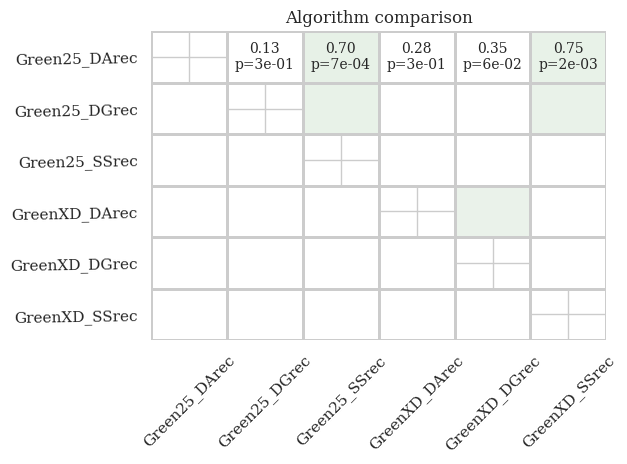

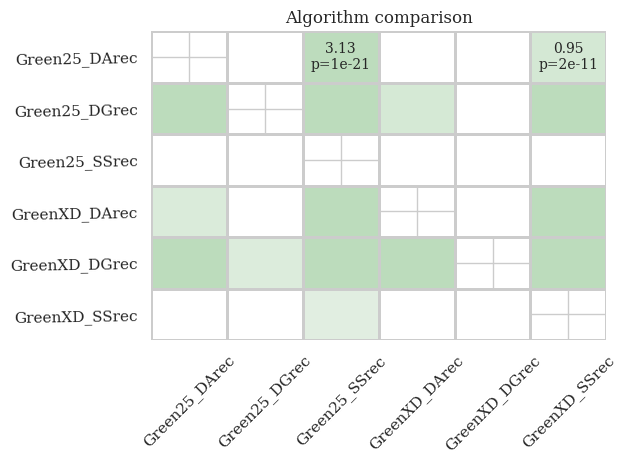

In [18]:
# stats = compute_dataset_statistics(results_all)
# P_all, T = find_significant_differences(stats)


# moabb_plt.summary_plot(P_all, T)
# plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats_tt = compute_dataset_statistics(results_rec_tt)
P_tt, T_tt = find_significant_differences(stats_tt)

moabb_plt.summary_plot(P_tt, T_tt)
plt.show()

# stats = compute_dataset_statistics(results_nor)
# P, T = find_significant_differences(stats)

# moabb_plt.summary_plot(P, T)
# plt.show()

### Graph

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\3467484760.py:45: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


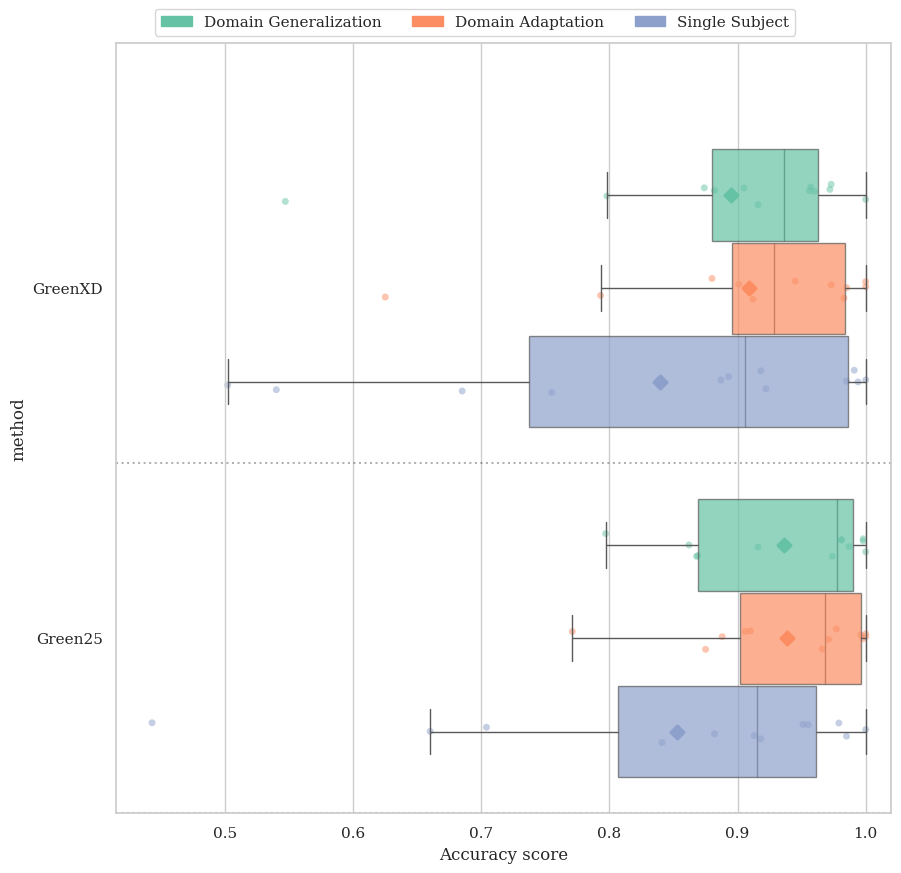

In [23]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS"],12*1),True)
# temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS","DG","DA","SS"],12*10),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*6))
# palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\1843062232.py:45: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


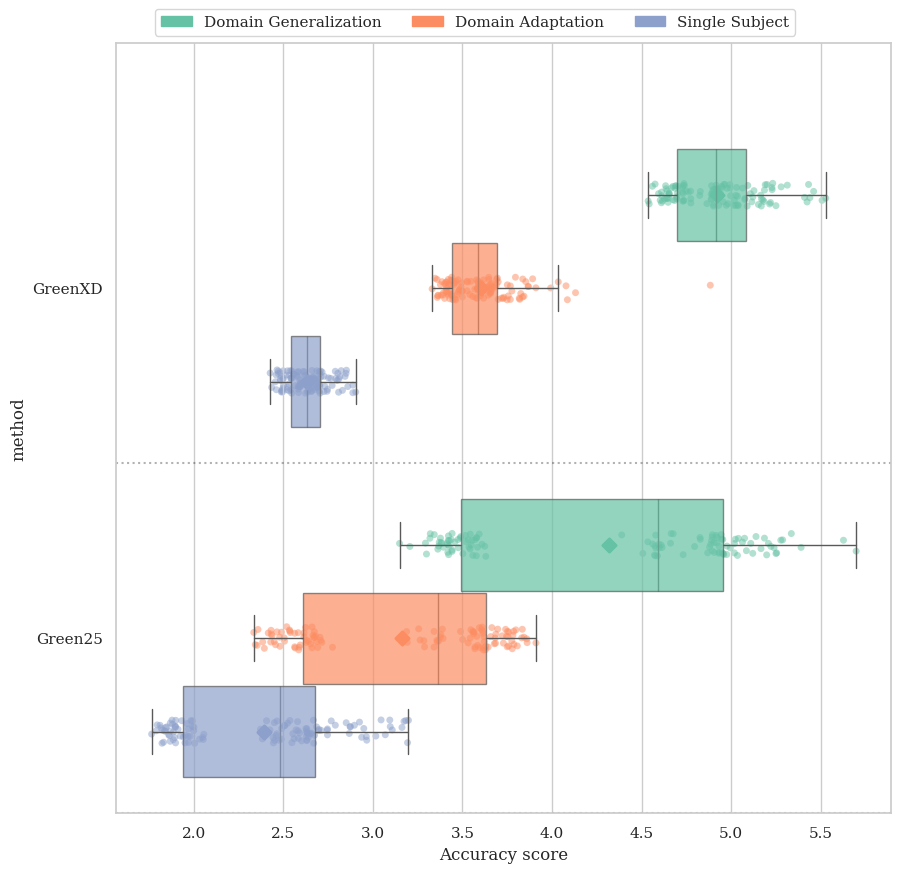

In [24]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec_tt.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS"],12*10),True)
# temp.insert(1,"procedure",np.repeat(["DG","DA","SS","DG","DA","SS","DG","DA","SS"],12*10),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*6))
# palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

## New dataset

In [33]:
Green_DGrec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_DG_score_code_0.35_recentered.csv",index_col=0)
Green_DArec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_DA_score_code_0.35_recentered.csv",index_col=0)
Green_SSrec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_SS_score_code_0.35_recentered.csv",index_col=0)

Green_DGrec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/tps_train/Green_DG_tps_train_0.35_recentered.csv",index_col=0)
Green_DArec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/tps_train/Green_DA_tps_train_0.35_recentered.csv",index_col=0)
Green_SSrec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/tps_train/Green_SS_tps_train_0.35_recentered.csv",index_col=0)


In [34]:
Green_DGrec_sc_v = np.concatenate(Green_DGrec_sc.values)
Green_DArec_sc_v = np.concatenate(Green_DArec_sc.values)
Green_SSrec_sc_v = np.concatenate(Green_SSrec_sc.values)


Green_DGrec_tt_v = np.concatenate(Green_DGrec_tt.values)
Green_DArec_tt_v = np.concatenate(Green_DArec_tt.values)
Green_SSrec_tt_v = np.concatenate(Green_SSrec_tt.values)

In [35]:
Green_DGrec_sc_v_mean = Green_DGrec_sc.mean(axis=0).values
Green_DArec_sc_v_mean = Green_DArec_sc.mean(axis=0).values
Green_SSrec_sc_v_mean = Green_SSrec_sc.mean(axis=0).values


Green_DGrec_tt_v_mean = Green_DGrec_tt.mean(axis=0).values
Green_DArec_tt_v_mean = Green_DArec_tt.mean(axis=0).values
Green_SSrec_tt_v_mean = Green_SSrec_tt.mean(axis=0).values

In [36]:
model_scores = [Green_DGrec_sc_v,Green_DArec_sc_v,Green_SSrec_sc_v,
                ]
model_scores_mean = [Green_DGrec_sc_v_mean,Green_DArec_sc_v_mean,Green_SSrec_sc_v_mean,
                     ]
names = ["Green_DGrec","Green_DArec","Green_SSrec",
         ]

setting = ["DG","DA","SS",
         ]

model_scores_tt = [Green_DGrec_tt_v,Green_DArec_tt_v,Green_SSrec_tt_v,
                ]
model_scores_mean_tt = [Green_DGrec_tt_v_mean,Green_DArec_tt_v_mean,Green_SSrec_tt_v_mean,
                     ]
names = ["Green_DGrec","Green_DArec","Green_SSrec",
         ]

setting = ["DG","DA","SS",
         ]
# list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

In [37]:
results_rec = pd.DataFrame()


for i, score in enumerate(model_scores):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec = results_rec.append(new_row, ignore_index=True)

results_rec_tt = pd.DataFrame()


for i, score in enumerate(model_scores_tt):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

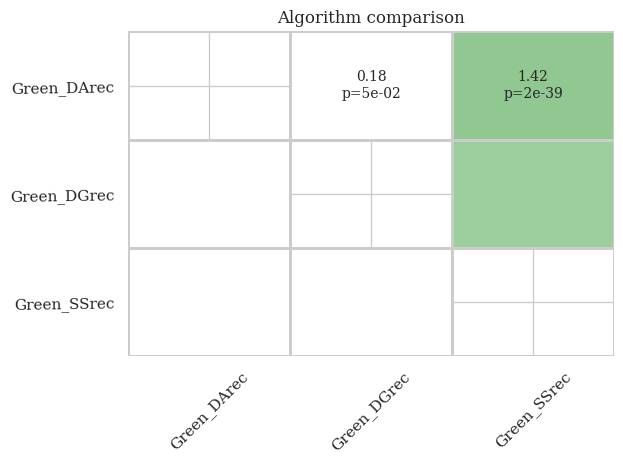

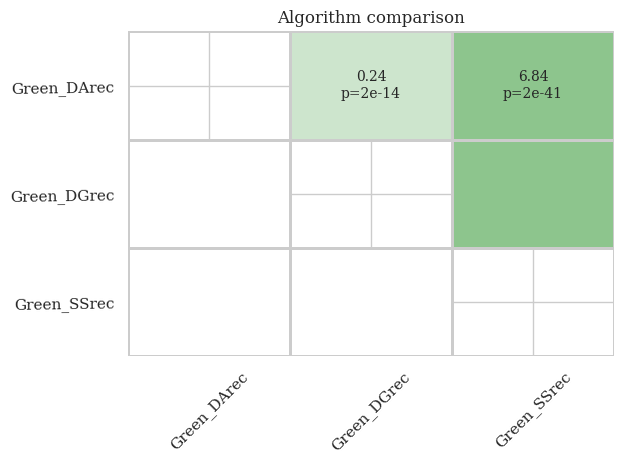

In [38]:
# stats = compute_dataset_statistics(results_all)
# P_all, T = find_significant_differences(stats)


# moabb_plt.summary_plot(P_all, T)
# plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats = compute_dataset_statistics(results_rec_tt)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()


# stats = compute_dataset_statistics(results_nor)
# P, T = find_significant_differences(stats)

# moabb_plt.summary_plot(P, T)
# plt.show()

### Graph

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2920451436.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


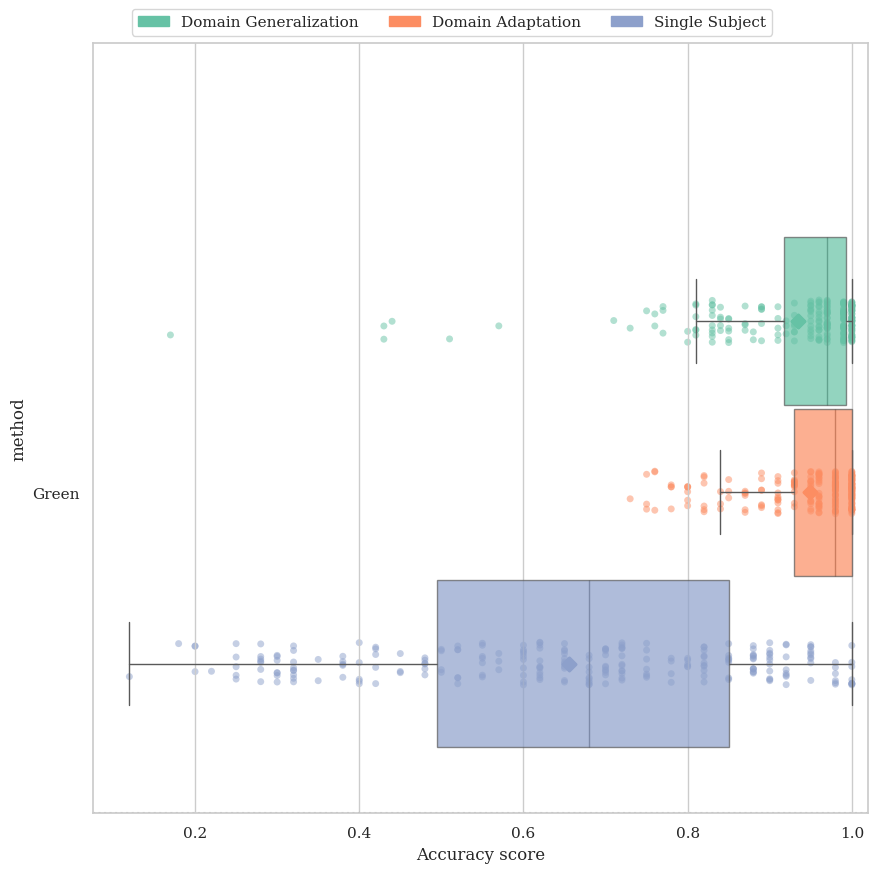

In [39]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS"],24*10),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\932888418.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


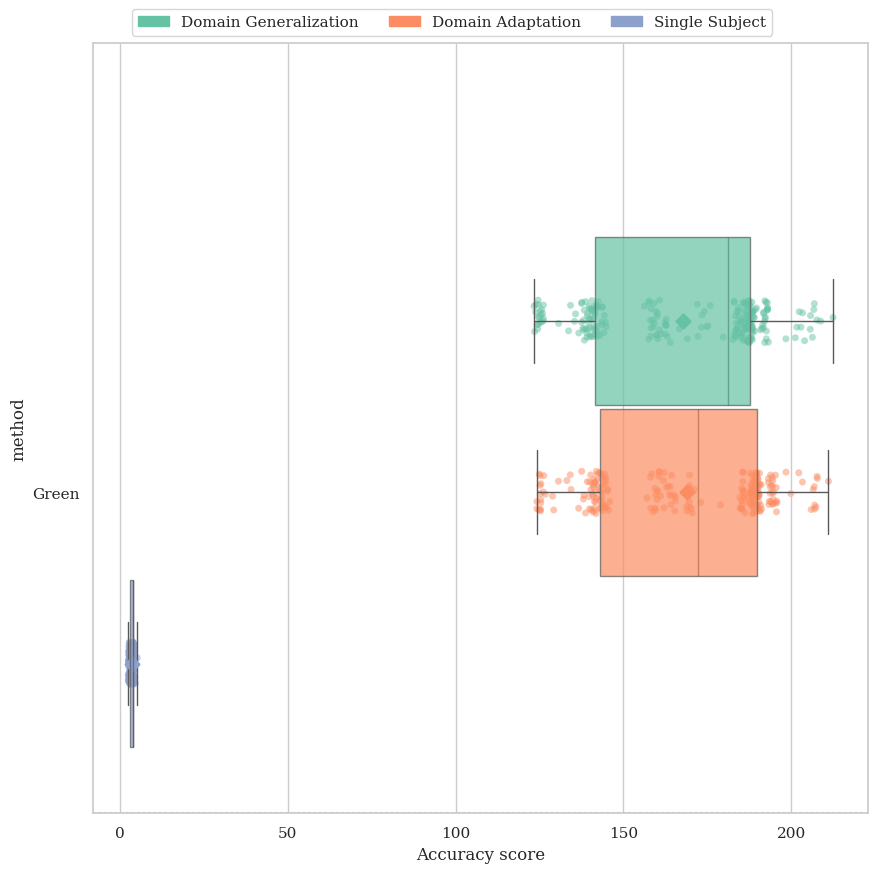

In [40]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec_tt.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS"],24*10),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

# GREEN similarity

In [12]:
DA_ss = []
similarity = ['0.05','0.1','0.15','0.2','0.25','0.3','0.35']

for i in range(len(similarity)):
    DA_ss.append(pd.read_csv("./Wavelets/Green_files/results_new_dataset_similarity/results/score/Green_DA_score_0.35_"+similarity[i]+"_recentered.csv",index_col=0))
SS_ss = pd.read_csv("./Wavelets/Green_files/results_new_dataset_similarity/results/score/Green_SS_score_0.35_None_recentered.csv",index_col=0)

In [13]:
DA_train = []

for i in range(len(similarity)):
    DA_train.append(pd.read_csv("./Wavelets/Green_files/results_new_dataset_similarity/results/tps_train/Green_DA_tps_train_0.35_"+similarity[i]+"_recentered.csv",index_col=0))
SS_train = pd.read_csv("./Wavelets/Green_files/results_new_dataset_similarity/results/tps_train/Green_SS_tps_train_0.35_None_recentered.csv",index_col=0)

In [14]:
DA_val = []

for i in range(len(similarity)):
    DA_val.append(np.concatenate(DA_ss[i].values))
SS_val = np.concatenate(SS_ss.values)

DA_mean = []

for i in range(len(similarity)):
    DA_mean.append(DA_ss[i].mean(axis=0).values)
SS_mean = SS_ss.mean(axis=0).values


In [15]:
DA_train_val = []

for i in range(len(similarity)):
    DA_train_val.append(np.concatenate(DA_train[i].values))
SS_train_val = np.concatenate(SS_train.values)

DA_train_mean = []

for i in range(len(similarity)):
    DA_train_mean.append(DA_train[i].mean(axis=0).values)
SS_train_mean = SS_train.mean(axis=0).values


In [16]:
names = ["sim_"+s for s in similarity]

In [18]:
DA_mean

[array([0.90318705, 0.73255485, 0.774723  , 0.87074077, 0.81749565,
        0.81767055, 0.8092274 , 0.86395448, 0.7452596 , 0.71976655,
        0.81663194, 0.74499528, 0.75602581, 0.84218116, 0.69007669,
        0.85825747, 0.91123109, 0.80684943, 0.71347403, 0.76367538,
        0.87796304, 0.81673485, 0.67844378, 0.89496524]),
 array([0.90097159, 0.73986533, 0.77823254, 0.8646237 , 0.82229973,
        0.82782218, 0.80424888, 0.85887437, 0.74400513, 0.70995658,
        0.82009341, 0.77103027, 0.76361914, 0.83992213, 0.69638928,
        0.85773063, 0.91077499, 0.81471985, 0.70862409, 0.76062595,
        0.87542477, 0.81043391, 0.67997947, 0.89624549]),
 array([0.89912941, 0.74530659, 0.77526159, 0.87156122, 0.81383695,
        0.82479262, 0.77914966, 0.86163006, 0.75567743, 0.70930182,
        0.82129755, 0.77349755, 0.76324351, 0.85705075, 0.68616715,
        0.85160455, 0.9110408 , 0.80975624, 0.71126526, 0.75786417,
        0.88049484, 0.82170145, 0.67947311, 0.90546894]),
 array([0.

### Through MOABB

In [18]:
results_rec = pd.DataFrame()


for i, score in enumerate(DA_val):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec = results_rec.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\1979290280.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\1979290280.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\1979290280.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\1979290280.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

In [19]:
results_rec_tt = pd.DataFrame()


for i, score in enumerate(DA_train_val):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\653065863.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\653065863.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\653065863.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_16372\653065863.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [20]:
# stats = compute_dataset_statistics(results_all)
# P_all, T = find_significant_differences(stats)


# moabb_plt.summary_plot(P_all, T)
# plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats_tt = compute_dataset_statistics(results_rec_tt)
P_tt, T_tt = find_significant_differences(stats_tt)

moabb_plt.summary_plot(P_tt, T_tt)
plt.show()

# stats = compute_dataset_statistics(results_nor)
# P, T = find_significant_differences(stats)

# moabb_plt.summary_plot(P, T)
# plt.show()

NameError: name 'compute_dataset_statistics' is not defined

### Graph

In [21]:
results_rec.groupby('pipeline')['score'].apply(np.mean)

pipeline
sim_0.05    0.801087
sim_0.1     0.802355
sim_0.15    0.802732
sim_0.2     0.800065
sim_0.25    0.800868
sim_0.3     0.802375
sim_0.35    0.805069
Name: score, dtype: float64

In [22]:
results_rec.groupby('pipeline')['score'].apply(np.std)

pipeline
sim_0.05    0.068276
sim_0.1     0.066577
sim_0.15    0.068221
sim_0.2     0.069787
sim_0.25    0.070651
sim_0.3     0.067967
sim_0.35    0.069528
Name: score, dtype: float64

In [23]:
results_rec.groupby('pipeline')['score'].apply(np.median)

pipeline
sim_0.05    0.809665
sim_0.1     0.811051
sim_0.15    0.810105
sim_0.2     0.808104
sim_0.25    0.807630
sim_0.3     0.808266
sim_0.35    0.812112
Name: score, dtype: float64

[Text(0.5, 0, 'Accuracy score')]

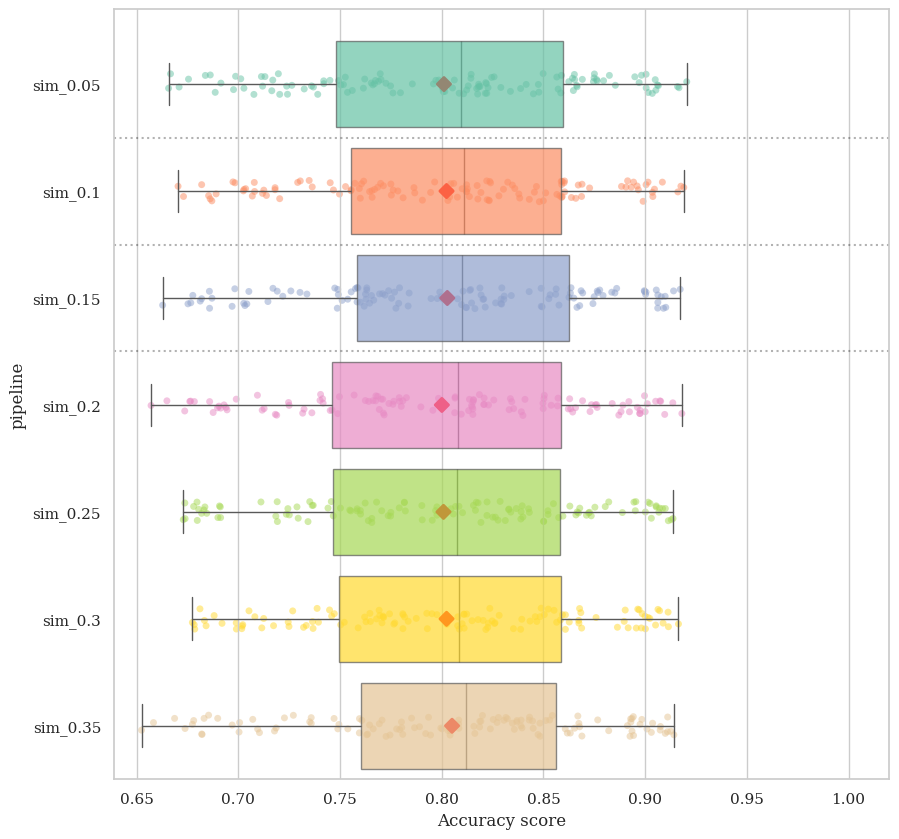

In [24]:
import PtitPrince as pt

x = "pipeline"
y = "score"
hue = "method"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec.copy()
# temp.insert(1,"procedure",np.repeat(["DA"],12*10),True)

n_pi = 3
palette = dict(zip(names, sns.color_palette('Set2', 7)))
# palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
ax.set_xlim(right=1.02)
# DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
# DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
# SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
# ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
#           handles=[DG_patch,DA_patch,SS_patch],
#              loc=(0.05, 1.01), ncols=n_pi)

[Text(0.5, 0, 'Training time')]

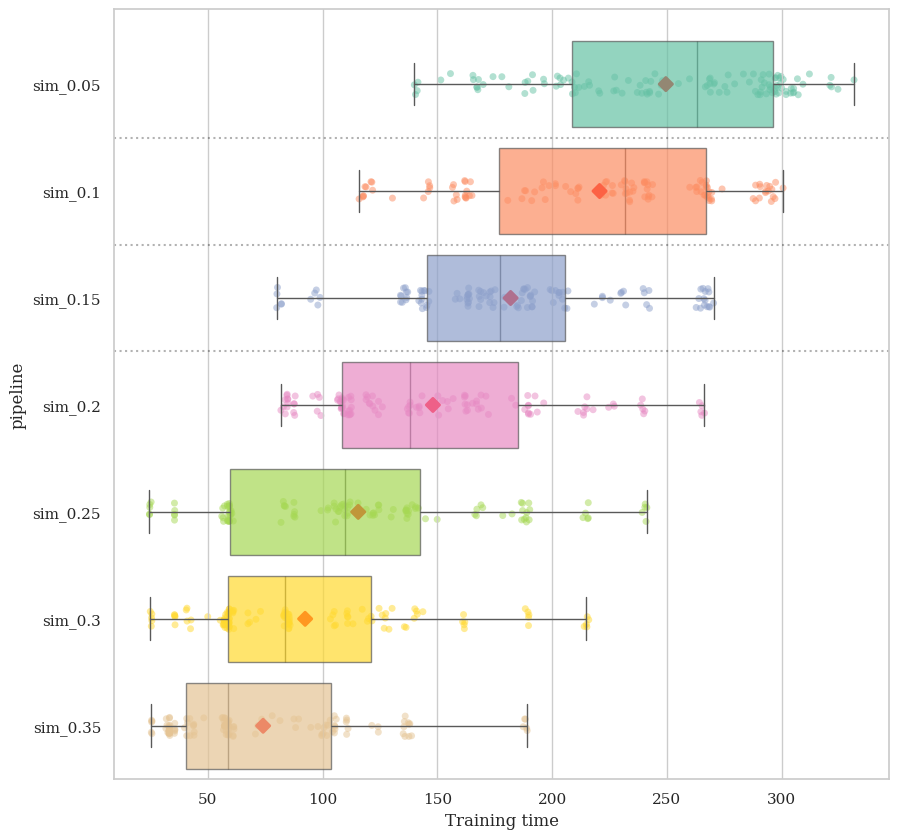

In [25]:
import PtitPrince as pt

x = "pipeline"
y = "score"
hue = "method"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec_tt.copy()

n_pi = 3
palette = dict(zip(names, sns.color_palette('Set2', 7)))
# palette = dict(zip(["DG","DA","SS","DG","DA","SS","DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim(right=1.02)
# DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
# DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
# SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Training time")
# ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
#           handles=[DG_patch,DA_patch,SS_patch],
#              loc=(0.05, 1.01), ncols=n_pi)

## New dataset

In [ ]:
Green_DGrec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_DG_score_code_0.35_recentered.csv",index_col=0)
Green_DArec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_DA_score_code_0.35_recentered.csv",index_col=0)
Green_SSrec_sc = pd.read_csv("./Wavelets/Green_files/results_new_dataset/score_code/Green_SS_score_code_0.35_recentered.csv",index_col=0)

Green_DGrec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/tps_train/Green_DG_tps_train_0.35_recentered.csv",index_col=0)
Green_DArec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/tps_train/Green_DA_tps_train_0.35_recentered.csv",index_col=0)
Green_SSrec_tt = pd.read_csv("./Wavelets/Green_files/results_new_dataset/tps_train/Green_SS_tps_train_0.35_recentered.csv",index_col=0)


In [ ]:
Green_DGrec_sc_v = np.concatenate(Green_DGrec_sc.values)
Green_DArec_sc_v = np.concatenate(Green_DArec_sc.values)
Green_SSrec_sc_v = np.concatenate(Green_SSrec_sc.values)


Green_DGrec_tt_v = np.concatenate(Green_DGrec_tt.values)
Green_DArec_tt_v = np.concatenate(Green_DArec_tt.values)
Green_SSrec_tt_v = np.concatenate(Green_SSrec_tt.values)

In [ ]:
Green_DGrec_sc_v_mean = Green_DGrec_sc.mean(axis=0).values
Green_DArec_sc_v_mean = Green_DArec_sc.mean(axis=0).values
Green_SSrec_sc_v_mean = Green_SSrec_sc.mean(axis=0).values


Green_DGrec_tt_v_mean = Green_DGrec_tt.mean(axis=0).values
Green_DArec_tt_v_mean = Green_DArec_tt.mean(axis=0).values
Green_SSrec_tt_v_mean = Green_SSrec_tt.mean(axis=0).values

In [ ]:
model_scores = [Green_DGrec_sc_v,Green_DArec_sc_v,Green_SSrec_sc_v,
                ]
model_scores_mean = [Green_DGrec_sc_v_mean,Green_DArec_sc_v_mean,Green_SSrec_sc_v_mean,
                     ]
names = ["Green_DGrec","Green_DArec","Green_SSrec",
         ]

setting = ["DG","DA","SS",
         ]

model_scores_tt = [Green_DGrec_tt_v,Green_DArec_tt_v,Green_SSrec_tt_v,
                ]
model_scores_mean_tt = [Green_DGrec_tt_v_mean,Green_DArec_tt_v_mean,Green_SSrec_tt_v_mean,
                     ]
names = ["Green_DGrec","Green_DArec","Green_SSrec",
         ]

setting = ["DG","DA","SS",
         ]
# list_n_train = [n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS,n_train_DG,n_train_DA,n_train_SS]
# list_n_test = [n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS,n_test_DG,n_test_DA,n_test_SS]

In [ ]:
results_rec = pd.DataFrame()


for i, score in enumerate(model_scores):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec = results_rec.append(new_row, ignore_index=True)

results_rec_tt = pd.DataFrame()


for i, score in enumerate(model_scores_tt):
    for k, sub_score in enumerate(score):
        new_row = {"dataset":"BurstVEP","subject":k,"session":1,"score":score[k],"n_channels":32,"pipeline":names[i],"method":names[i].split("_")[0]}
        results_rec_tt = results_rec_tt.append(new_row, ignore_index=True)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_rec = results_rec.append(new_row, ignore_index=True)
C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2216327116.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

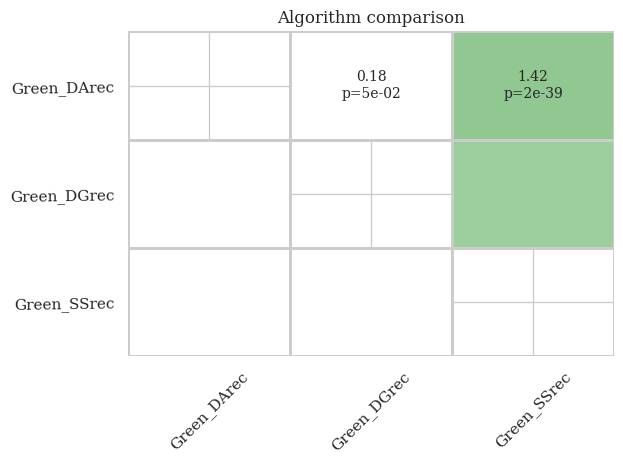

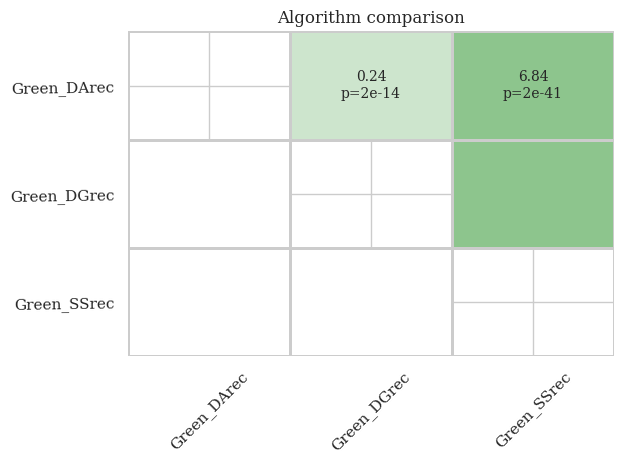

In [ ]:
# stats = compute_dataset_statistics(results_all)
# P_all, T = find_significant_differences(stats)


# moabb_plt.summary_plot(P_all, T)
# plt.show()

stats = compute_dataset_statistics(results_rec)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()

stats = compute_dataset_statistics(results_rec_tt)
P, T = find_significant_differences(stats)

moabb_plt.summary_plot(P, T)
plt.show()


# stats = compute_dataset_statistics(results_nor)
# P, T = find_significant_differences(stats)

# moabb_plt.summary_plot(P, T)
# plt.show()

### Graph

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\2920451436.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


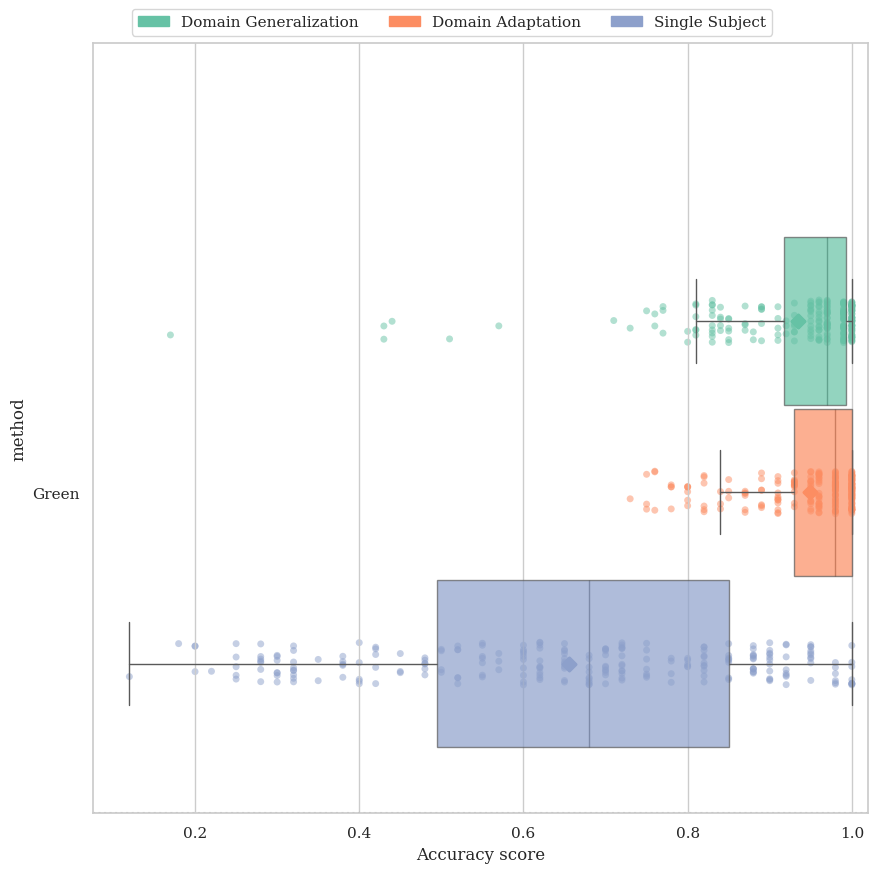

In [ ]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS"],24*10),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)

C:\Users\s.velut\AppData\Local\Temp\ipykernel_15588\932888418.py:43: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],


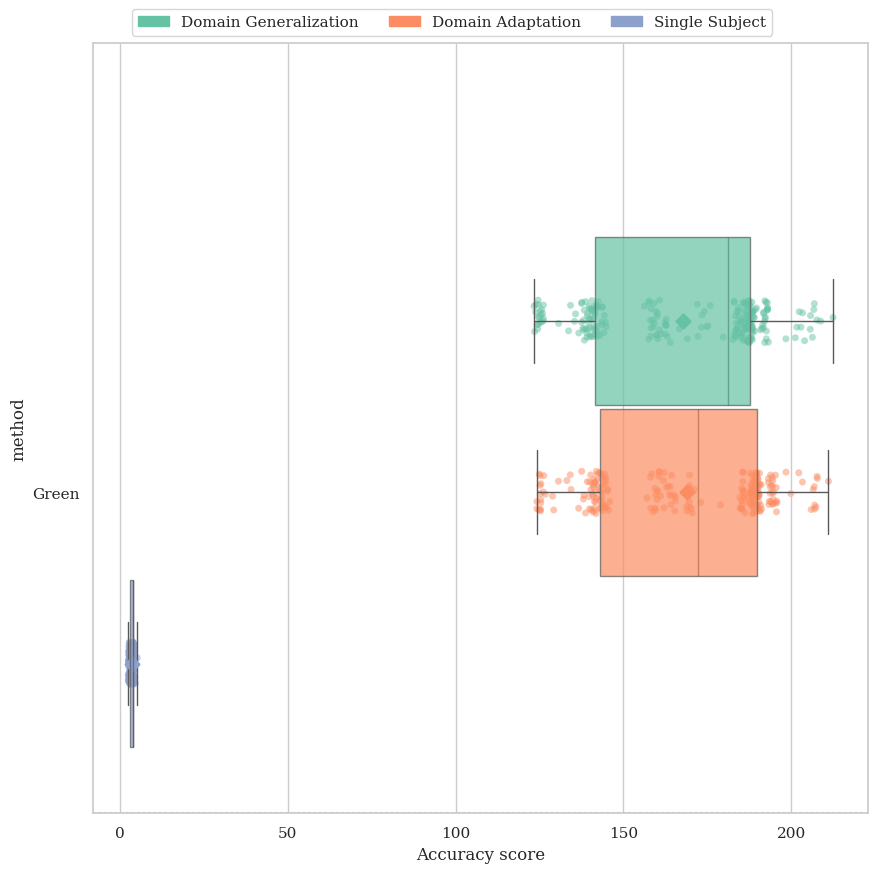

In [ ]:
import PtitPrince as pt

x = "method"
y = "score"
hue = "pipeline"

boxplot_lw = 1.0
boxplot_props = {'linewidth': boxplot_lw}

temp = results_rec_tt.copy()
temp.insert(1,"procedure",np.repeat(["DG","DA","SS"],24*10),True)

n_pi = 3
palette = dict(zip(["DG","DA","SS"], sns.color_palette('Set2', 3)*3))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
pt.RainCloud(
    data=temp, y=y, x=x,
    hue='procedure',
    bw='scott',
    width_viol=0, width_box=0.8, point_size=5,
    dodge=True, orient='h',
    linewidth=0, box_linewidth=boxplot_lw,
    box_whiskerprops=boxplot_props,
    box_medianprops=boxplot_props,
    alpha=0.7, palette=palette,
    box_showfliers=False,
    ax=ax, pointplot=True,
    point_linestyles="none",
    point_markers='D',)



# ax.set_yticks([])

for i in range(n_pi):
    ax.axhline(y=i + 0.5, xmin=0, xmax=1.02, color='black', linestyle=':', alpha=0.3)
# ax.set_xlim(right=1.02)
DG_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[0], label='Domain Generalization')
DA_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[1], label='Domain Adaptation')
SS_patch = mpatches.Patch(color=sns.color_palette('Set2', 3)[2], label='Single Subject')

ax.set(xlabel="Accuracy score")
ax.legend(['Domain Generalization', 'Domain Adaptation', 'Single Subject'],
          handles=[DG_patch,DA_patch,SS_patch],
             loc=(0.05, 1.01), ncols=n_pi)